# Clustering
## Hotel customer segmentation
### This notebook uses the dateset *HotelCustomersDataset.tsv*


## Dataset description

Please check the following URL for information about the dataset structure and content: https://www.sciencedirect.com/science/article/pii/S2352340920314645

## Work description

#### Introduction
<p>Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing. Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.</p>

#### Customer segmentation in hotel H
<p>Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one only customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.</p>
<p>Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers.</p>

#### The challenge
<p>Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database.</p>

## [1. Business Understanding](#1.)

- ### [1.1. Background and Business objectives](#1.1.)


## [2. Data Understanding](#2.)
- ### [2.1. Dataset description](#2.1.)
- ### [2.2. Initializations and data loading](#2.2.)
- ### [2.3. Correlations](#2.3.)
- ### [2.4. Data Understanding Summary](#2.4.)


## [3. Data Preparation](#3.)
- ### [3.1 Make a copy of the original dataset](#3.1)
- ### [3.2 Checking duplicated lines](#3.2)
- ### [3.3 Missing Values Treatment](#3.3)
- ### [3.4 Set an Index ](#3.4)
- ### [3.5 Outliers ](#3.5)
- ### [3.6 Skewness ](#3.6)
- ### [3.7 Feature Selection ](#3.7)
- ### [3.8 Normalising Variables](#3.8)
- ### [3.9 Coherence procedures and PCA](#3.9)

## [4. Modeling](#4.)
- ### [4.1.K-Means with PCA](#4.1)
- ### [4.2 K-Means](#4.2)
- ### [4.3 Hierarchical Clustering](#4.3)
- ### [4.4 Agglomerative Hierarchical Clustering](#4.4)
- ### [4.5 Density-based Algorithm](#4.5)
- ### [4.6 K-Prototype Algorithm ](#4.6)

## [5. Clustering Interpretation](#5.)


## [6. Conclusion](#6.) 
        
        
        
        
        

---------------------------------------------------------------------------------------------------------------

<a class="anchor" id="1.">
    
# 1. Business Understanding

<a class="anchor" id="1.1.">

## 1.1. Background and business objectives    


Throughout the implementation of this project, we followed the Crisp-DM Project Lifecycle - including the six phases of Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation & Deployment - in oder to assure good data quality and therefore a good predictive model to achieve the business objectives.

In Python different packages were being used for distinct functions:

• Pandas Package: Data Analysis (loading file, missing data, data understanding).

• NumPy Package: Mathematical functions to operate on arrays.

• Matplotlib Package: Data visualization.

• Seaborn Package: Statistical data visualization.

• Sklearn Package: For Scaling, Normalization and pairwise distances

• Category_encoders: A set of scikit-learn-style transformers for encoding categorical variables into 
numeric with different techniques.


Include all models


<a class="anchor" id="2.">

# 2. Data Understanding


<a class="anchor" id="2.1.">

## 2.1. Dataset description

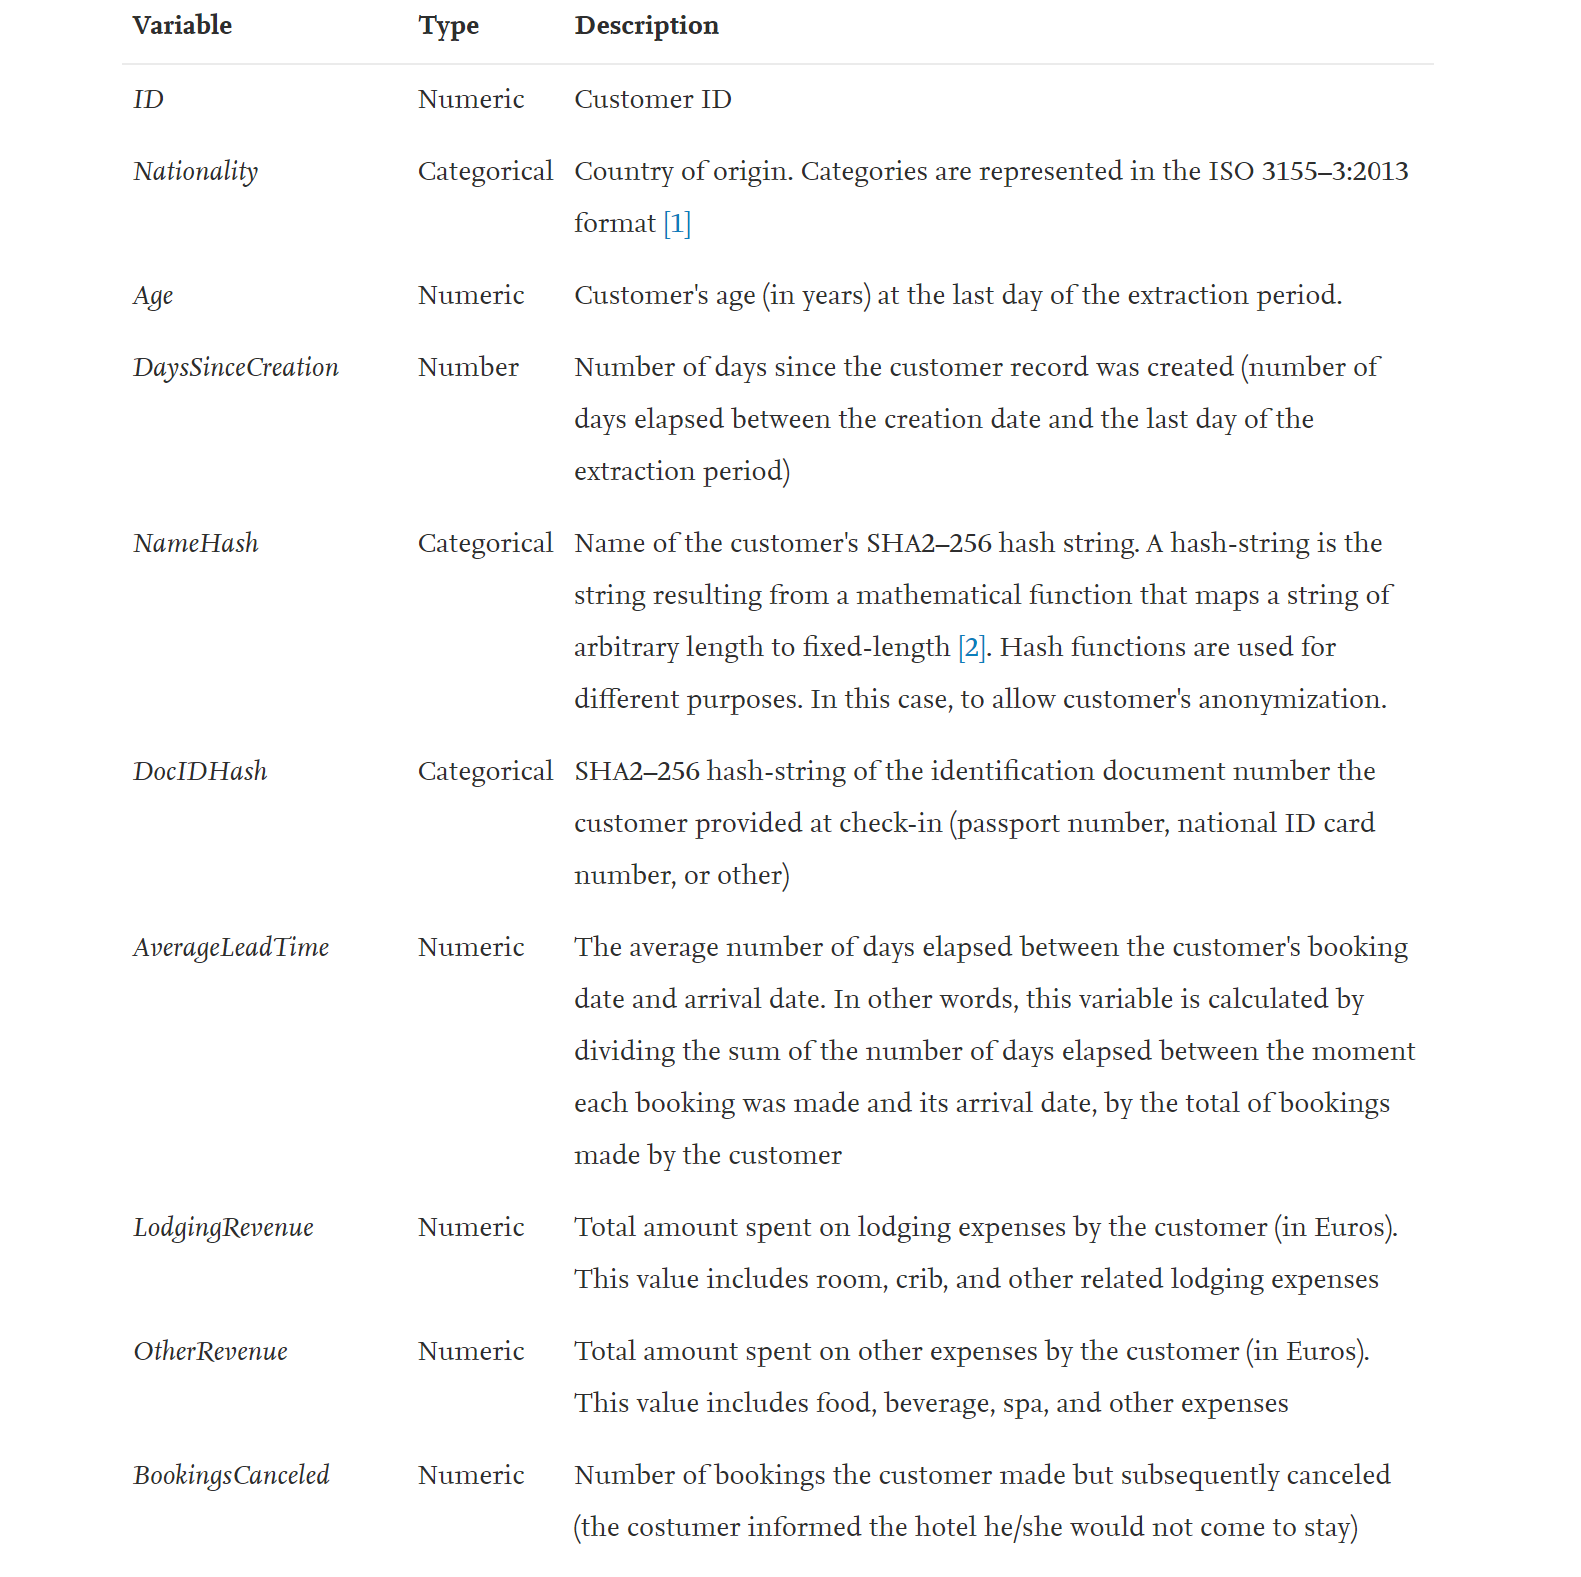

In [1]:
from IPython import display
display.Image(r'Screenshot_data.png')

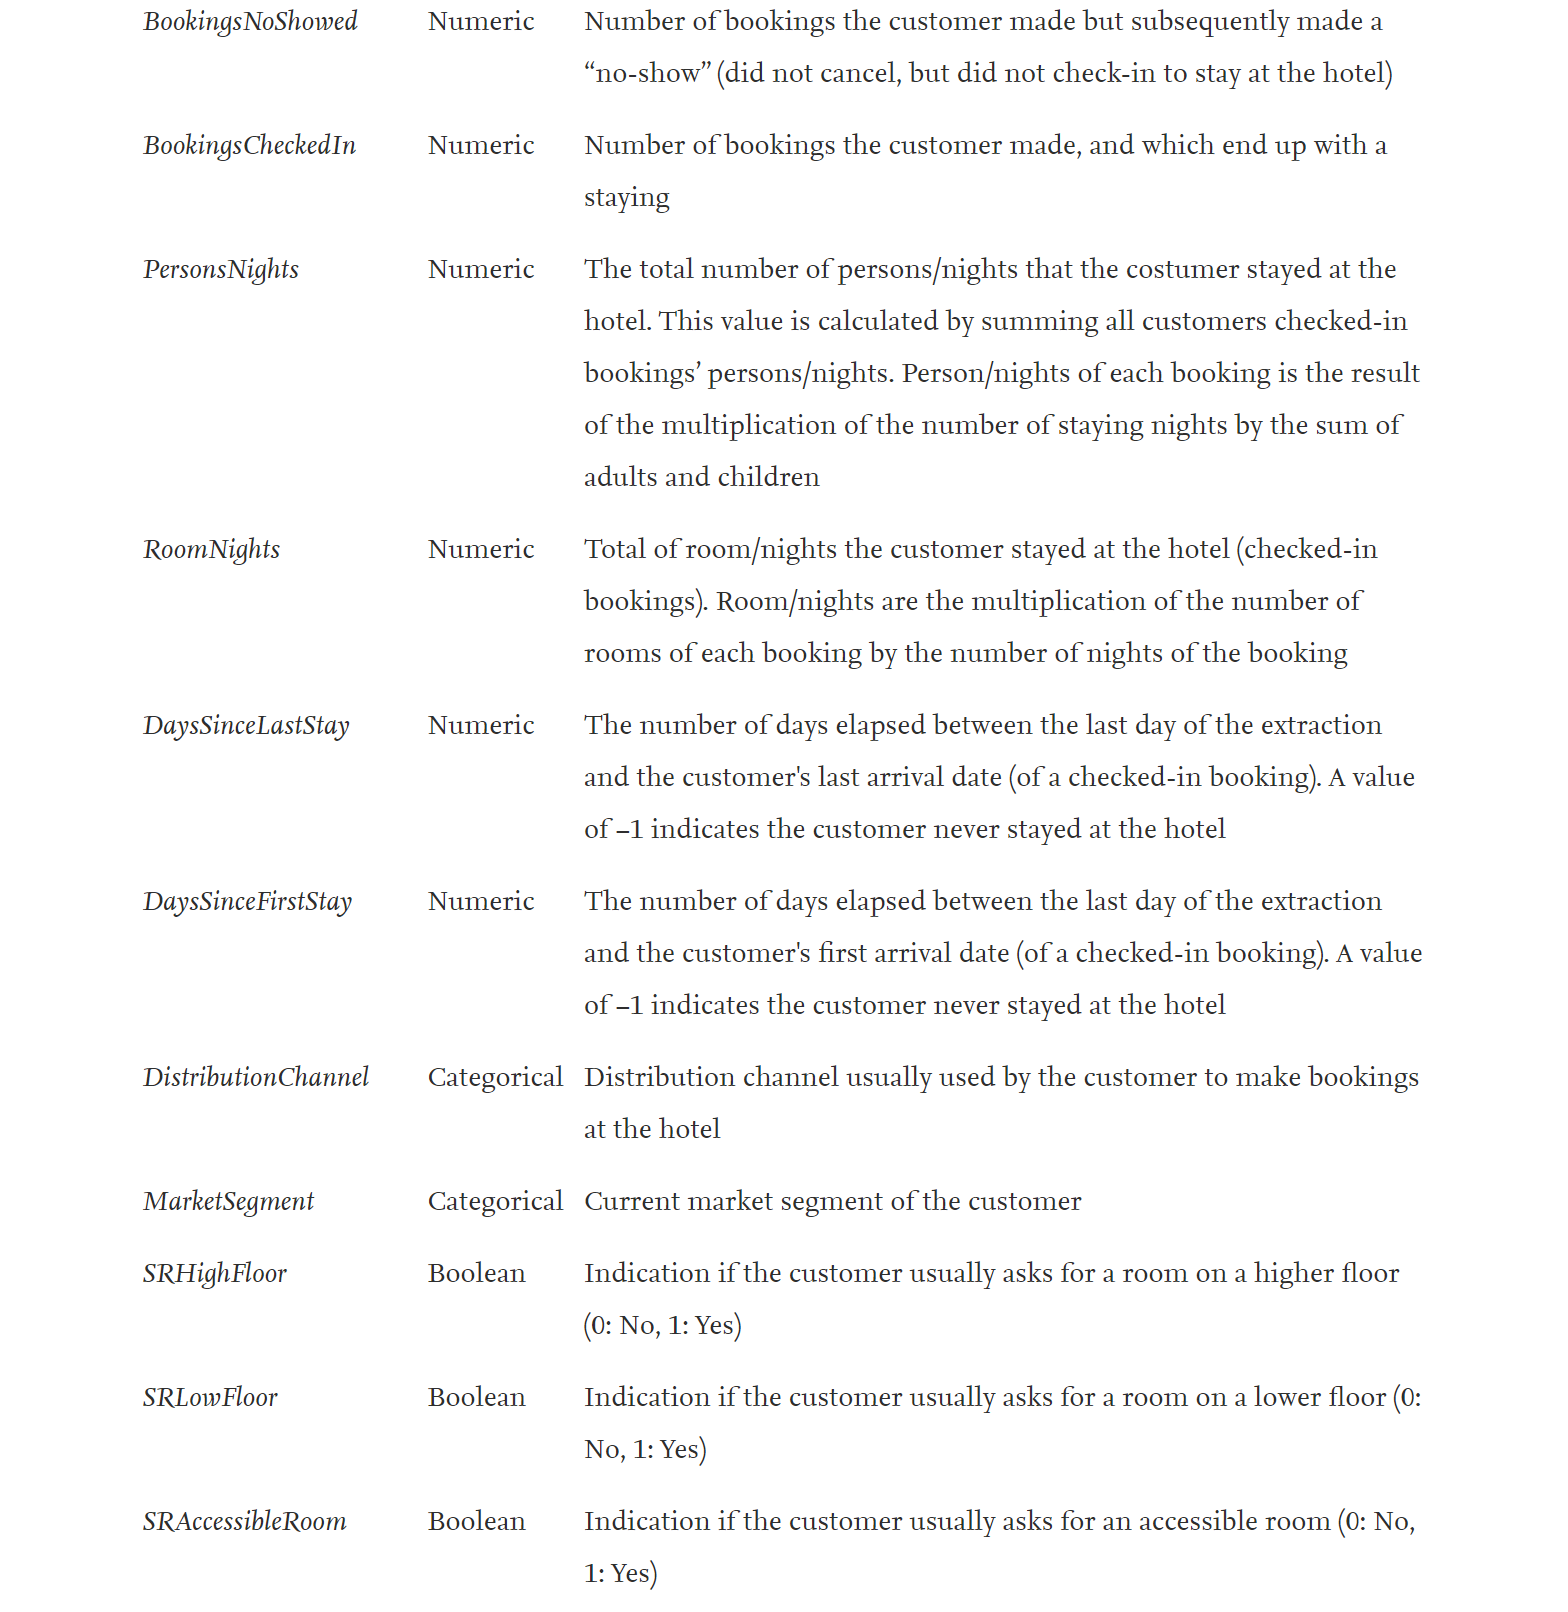

In [2]:
display.Image(r'Screenshot_data2.png')

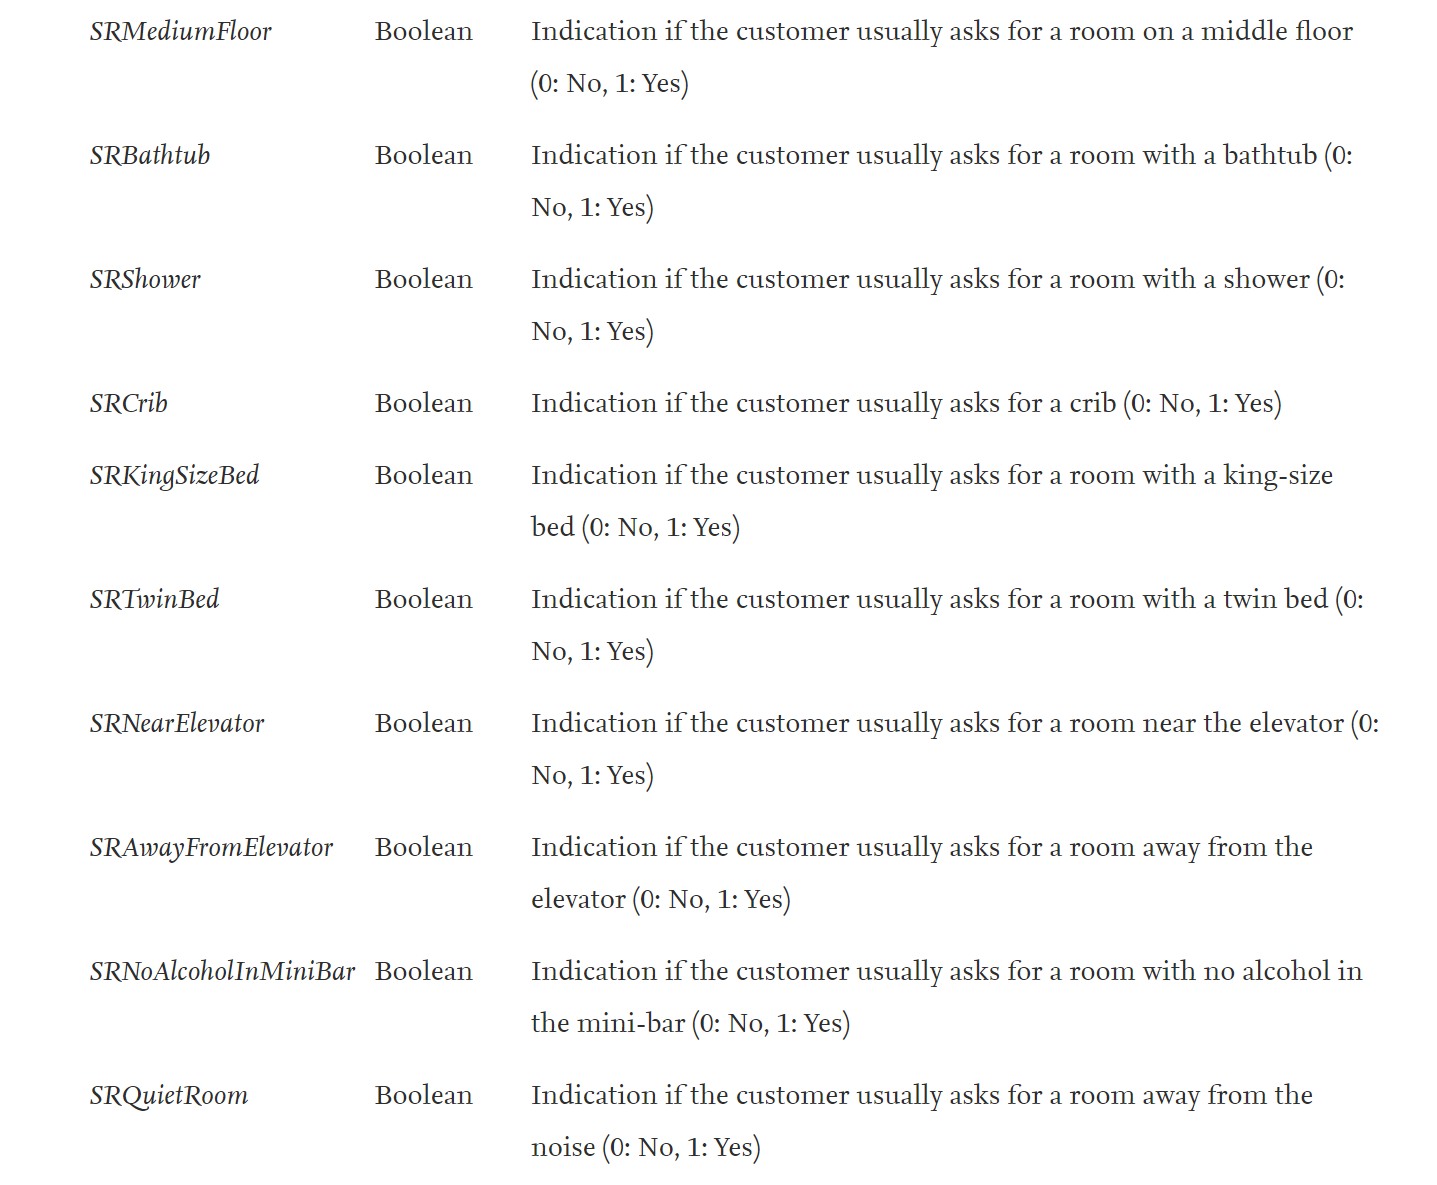

In [3]:
display.Image(r'Screenshot_data3.png')

<a class="anchor" id="2.2.">

## 2.2. Initializations and data loading

In [4]:
# Loading packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import category_encoders as ce
from matplotlib import ticker
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.cluster.vq import whiten
import plotly.graph_objs as go

%pip install riskfolio-lib
import riskfolio as rp

%pip install kmodes
from kmodes.kprototypes import KPrototypes

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [6]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv(r'HotelCustomersDataset.tsv', sep="\t")
ds.describe(include='all').T

count unique  \
ID                    83590.0    NaN   
Nationality             83590    188   
Age                   79811.0    NaN   
DaysSinceCreation     83590.0    NaN   
NameHash                83590  80642   
DocIDHash               83590  76993   
AverageLeadTime       83590.0    NaN   
LodgingRevenue        83590.0    NaN   
OtherRevenue          83590.0    NaN   
BookingsCanceled      83590.0    NaN   
BookingsNoShowed      83590.0    NaN   
BookingsCheckedIn     83590.0    NaN   
PersonsNights         83590.0    NaN   
RoomNights            83590.0    NaN   
DaysSinceLastStay     83590.0    NaN   
DaysSinceFirstStay    83590.0    NaN   
DistributionChannel     83590      4   
MarketSegment           83590      7   
SRHighFloor           83590.0    NaN   
SRLowFloor            83590.0    NaN   
SRAccessibleRoom      83590.0    NaN   
SRMediumFloor         83590.0    NaN   
SRBathtub             83590.0    NaN   
SRShower              83590.0    NaN   
SRCrib                83590.0    NaN   
SRKingSizeBed         83590.0    NaN   
SRTwinBed             83590.0    NaN   
SRNearElevator        83590.0    NaN   
SRAwayFromElevator    83590.0    NaN   
SRNoAlcoholInMiniBar  83590.0    NaN   
SRQuietRoom           83590.0    NaN   

                                                                    top  \
ID                                                                  NaN   
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0xD1490806AB49549565586CE26419163D5EFDD3C607B9...   
DocIDHash             0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DaysSinceLastStay                                                   NaN   
DaysSinceFirstStay                                                  NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq        mean           std   min       25%  \
ID                      NaN     41795.5  24130.498838   1.0  20898.25   
Nationality           12422         NaN           NaN   NaN       NaN   
Age                     NaN   45.398028     16.572368 -11.0      34.0   
DaysSinceCreation       NaN  453.640902    313.390

In [7]:
ds.shape

(83590, 31)

In [8]:
#check Nationalities
ds[['Nationality']].describe()

Nationality
count        83590
unique         188
top            FRA
freq         12422

In [9]:
# Display info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [10]:
# Display top 10 rows
ds.head(10)

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   
5   6         JPN  54.0               1095   
6   7         JPN  49.0               1095   
7   8         FRA  32.0               1095   
8   9         FRA  42.0               1095   
9  10         IRL  25.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   
5  0x6E70C1504EB27252542F58E4D3C8C83516E093334721...   
6  0x1DD6DA89DEECA1841ABD572562982EE905566F4469AC...   
7  0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...   
8  0xD9D899DA4FB0CF23FDF902C1B237A30AE854FFBC79FC...   
9  0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF77247B202DD0820F49407C762C14A603B3A...                0   
5  0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...               58   
6  0xAB9CEF189D944E0607A55E48023A3A5290722C0DFC1B...                0   
7  0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...               38   
8  0xCCDDA9F399058BA00C9A53C107F986F1B5CECD1CEAEF...                0   
9  0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...               96   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           371.0         105.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   
3           240.0          60.0                 0  ...              0   
4             0.0           0.0                 0  ...              0   
5           230.0          24.0                 0  ...              0   
6             0.0           0.0                 0  ...              0   
7           535.0          94.0                 0  ...              0   
8             0.0           0.0                 0  ...              0   
9           174.0          69.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
0          0         0       0              0          0              0   
1          0         0       0              0          0              0   
2          0         0       0              0          0              0   
3          0         0       0              0          0              0   
4          0         0       0              0          0              0   
5          0         0       0              0          0              0   
6          0         0       0              0          0              0   
7          0         0       0              1          0              0   
8          0         0       0              1          0              0   
9          0         0       0              0          0              0   

  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                  0                     0            0  
1                  0                     0            0  
2                  0                     0            0  
3                  0                     0            0  
4                  0                     0            0  
5                  0                     0            0  
6                  0                   

In [11]:
#Check number of values

ds[['BookingsCanceled']].describe()

BookingsCanceled
count      83590.000000
mean           0.002022
std            0.066770
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            9.000000

In [12]:
#Checking for missing values
print(ds.isnull().sum())

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64


In [13]:
# Check for missing values %
# ds.isna().sum()/len(ds)*100 --
ds.isnull().sum()/len(ds)*100

ID                      0.000000
Nationality             0.000000
Age                     4.520876
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

In [14]:
# Check for duplicates
ds.duplicated().sum()

0

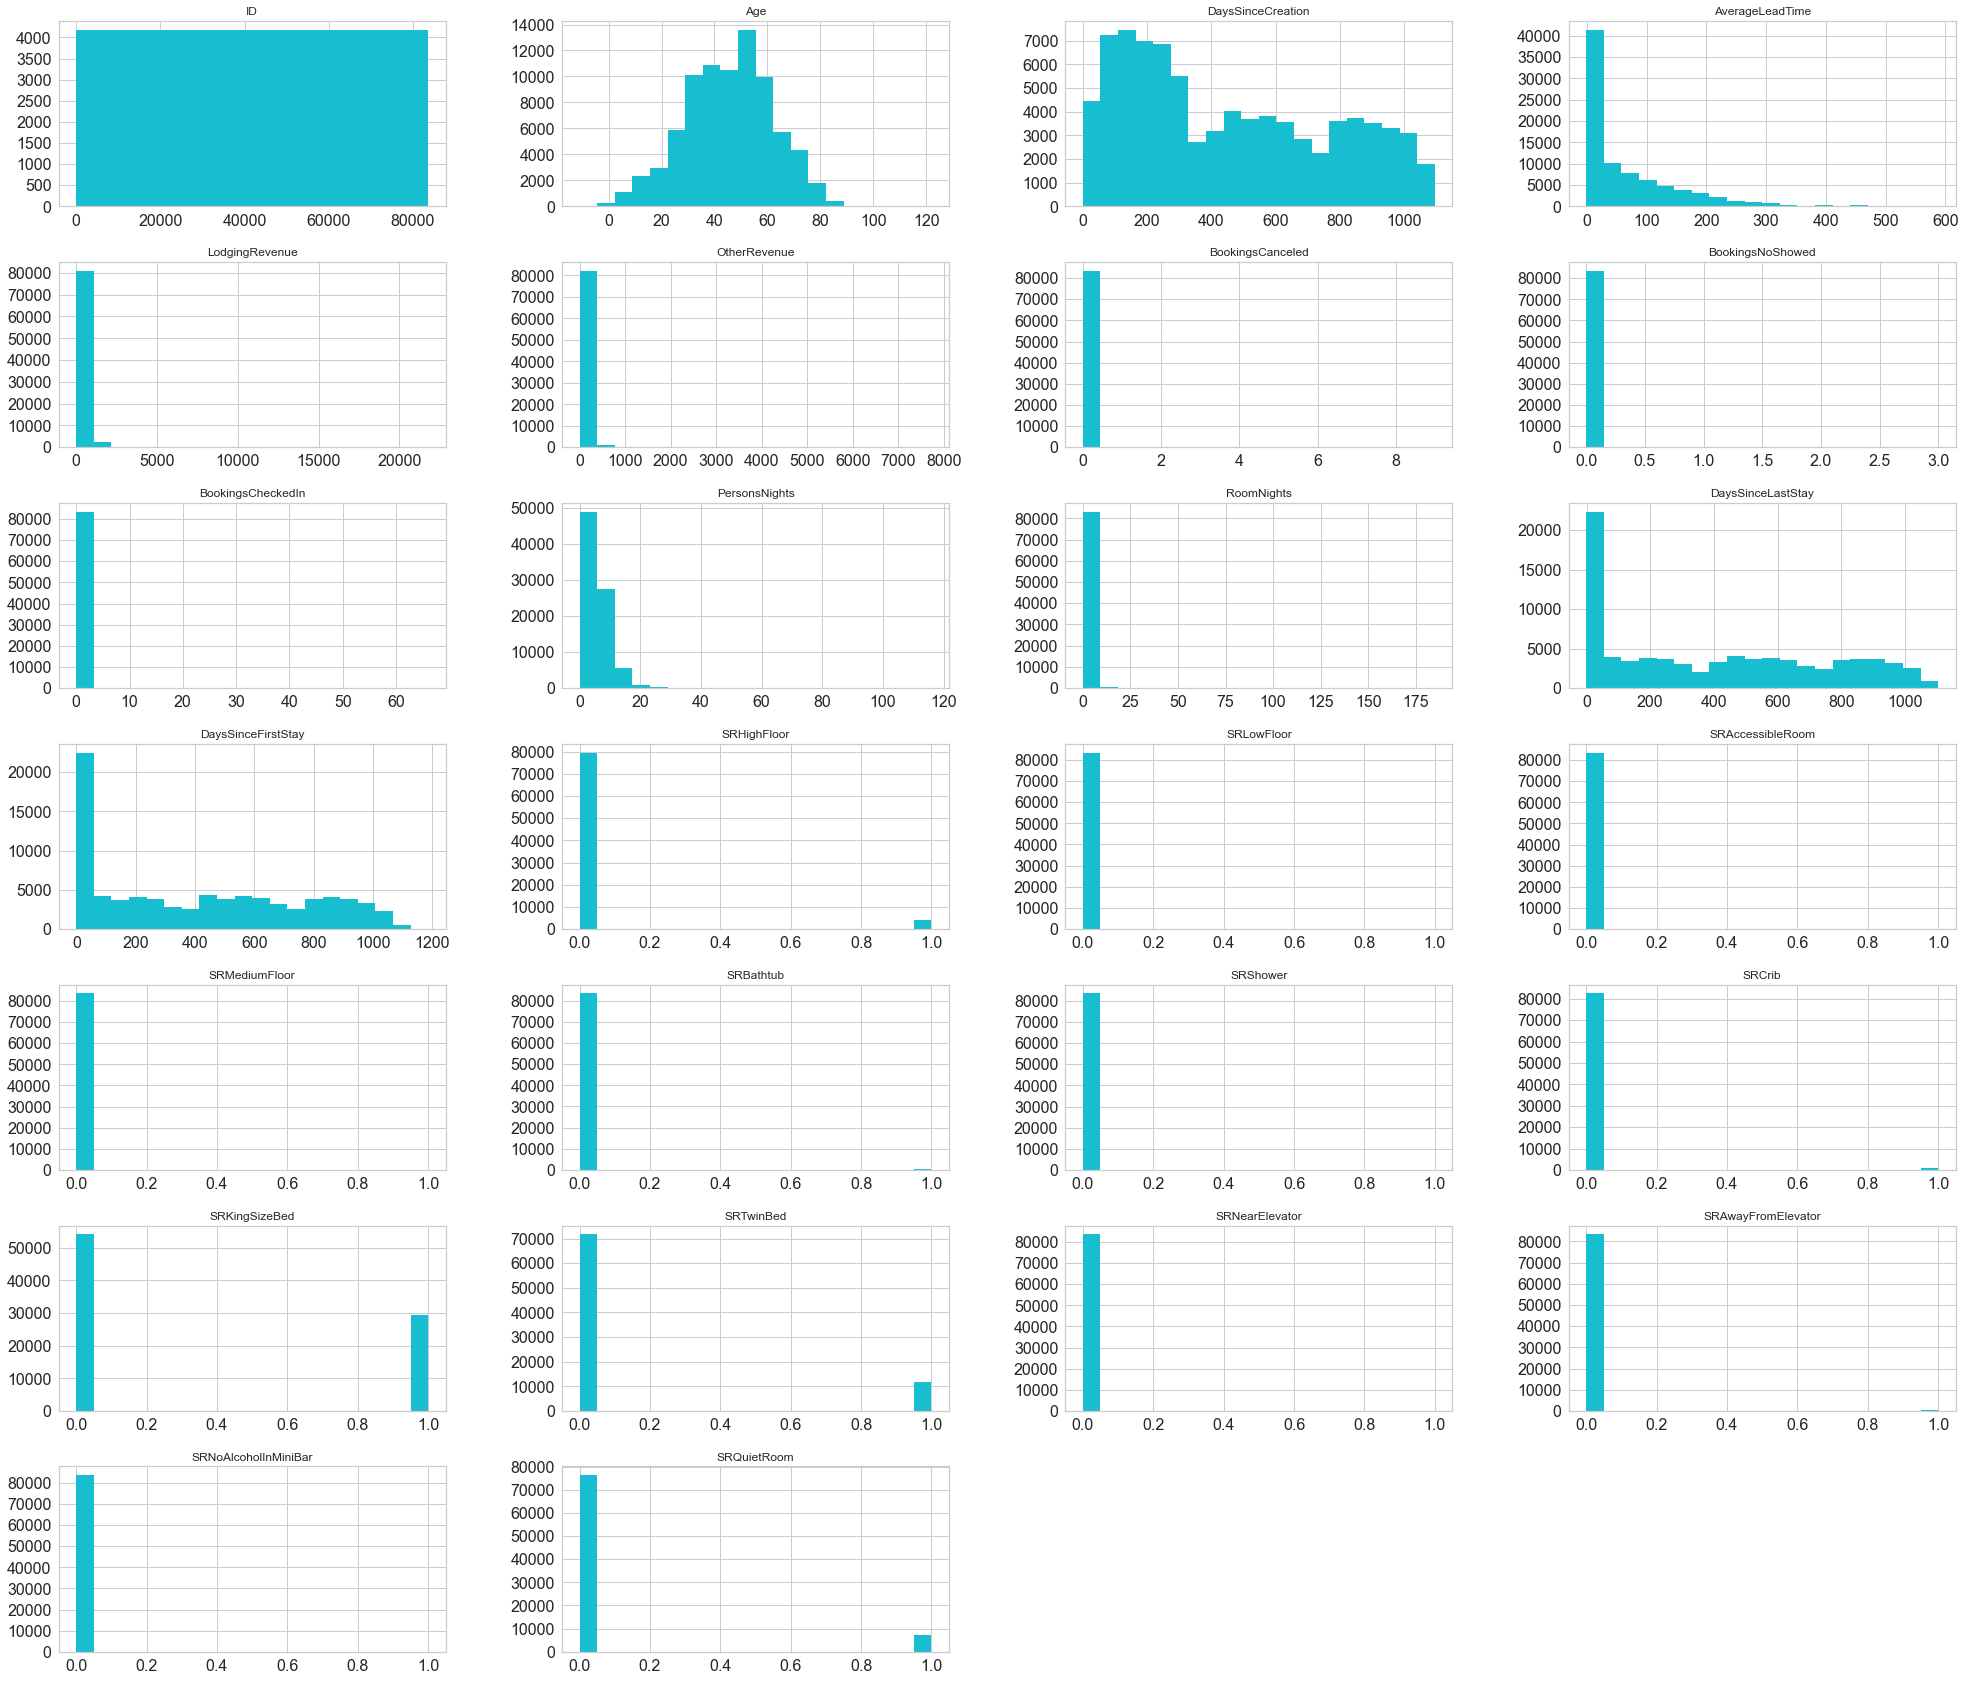

In [15]:
# histograms on all numeric variables to check distribution
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(34, 30), layout=(7, 4), xlabelsize=16, ylabelsize=16, color ='#17becf');

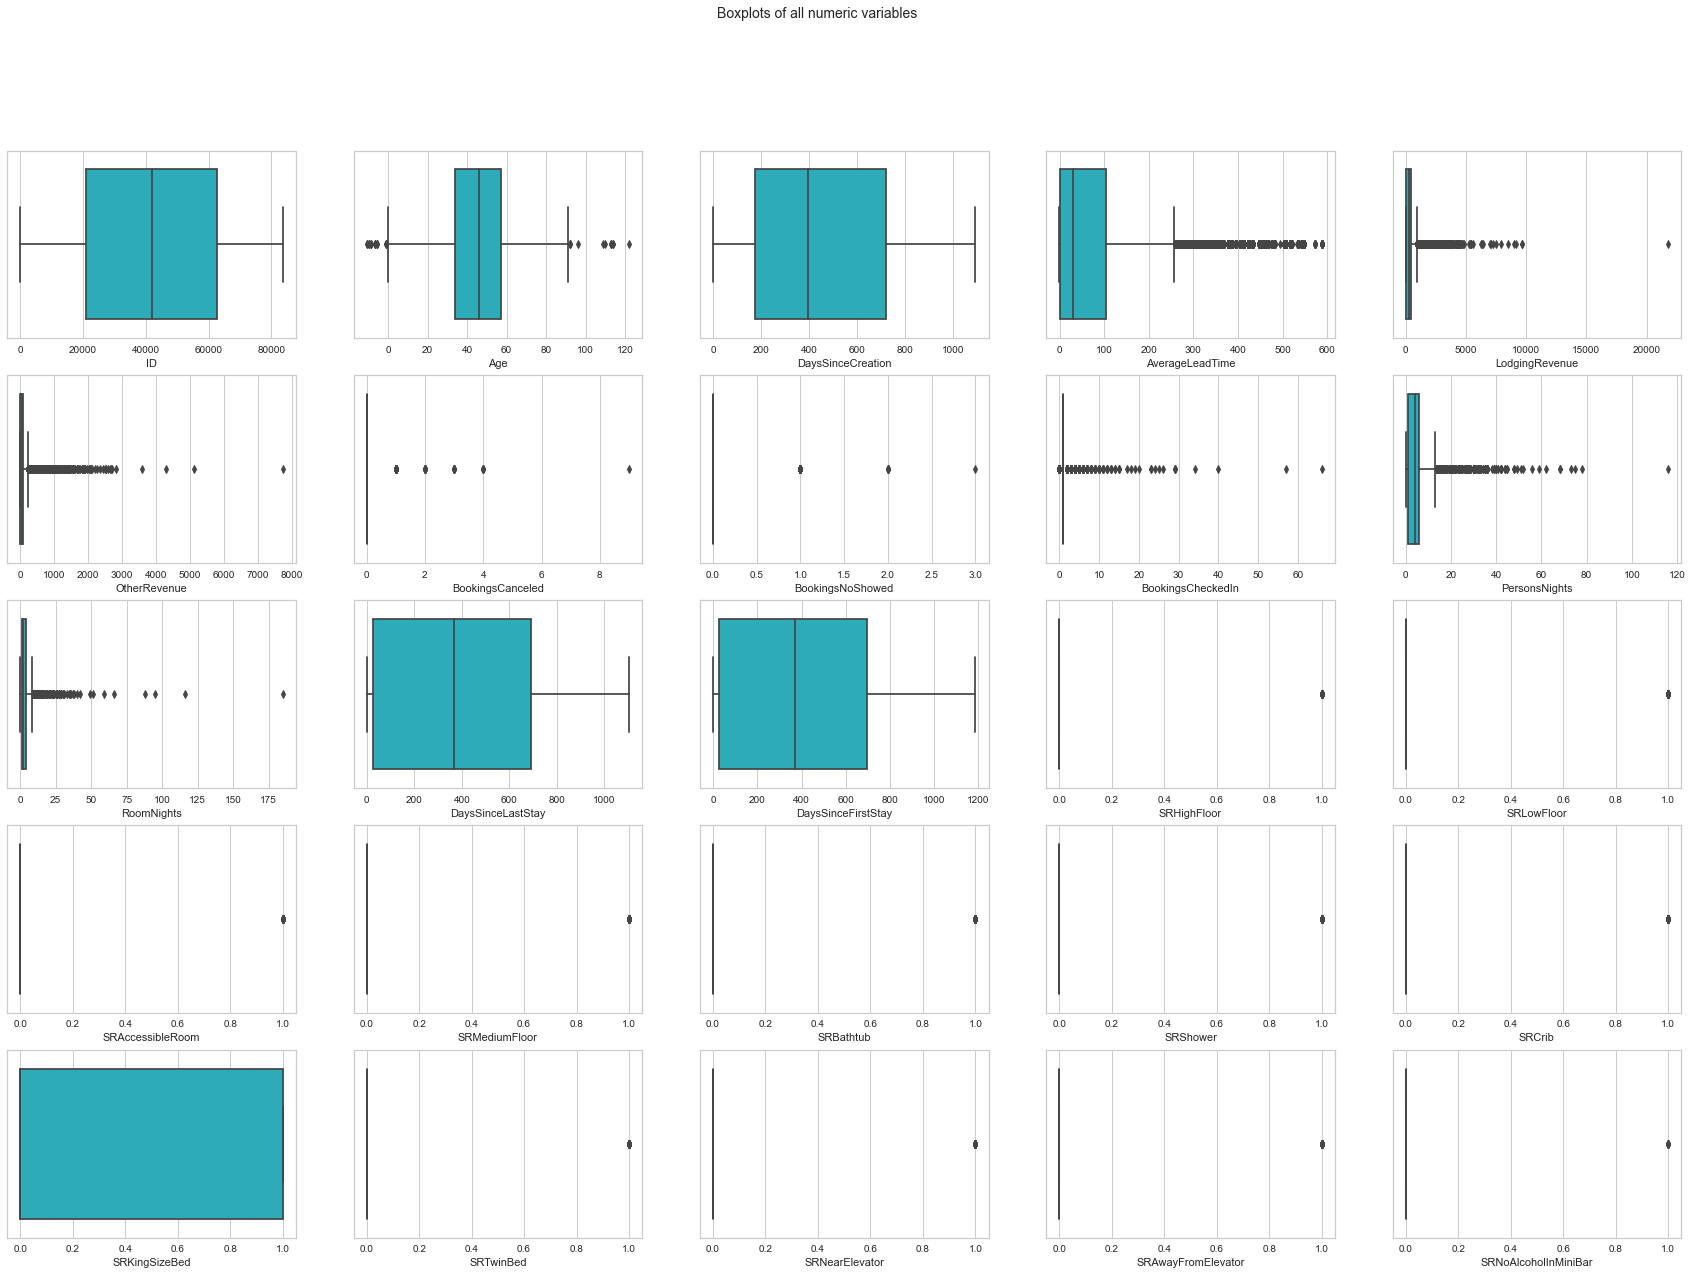

In [16]:
#Boxplots to check outliers
numerical=ds.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(5, 5, figsize = (30,20))
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.boxplot(data = ds,
                 x = var,
                 color = '#17becf',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);


<a class="anchor" id="2.3.">

## 2.3. Correlations

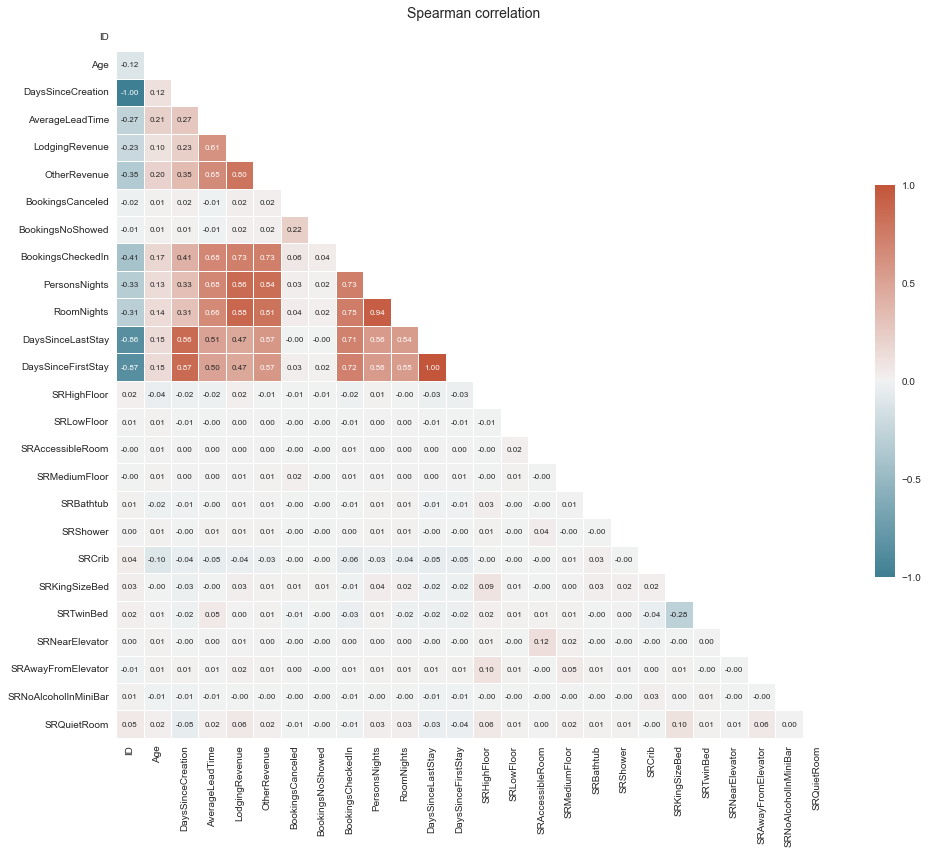

In [17]:
#Create correlation matrix
corr = ds.corr(method = 'spearman')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#Draw
cmap = sns.diverging_palette(220, 20, as_cmap = True) #aqui da para mudar a cor
fig , ax = plt.subplots(figsize = (16, 18))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = cmap,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt = '.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})
                      

#Decoration
plt.title("Spearman correlation", fontsize = plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Cross Table

In [18]:
# Exploration of categorical variables: cross table of job and education
table1 = pd.crosstab(index=ds['MarketSegment'], columns=ds['DistributionChannel'])
table1

DistributionChannel    Corporate  Direct  Electronic Distribution  \
MarketSegment                                                       
Aviation                     239       0                        0   
Complementary                 14     393                        0   
Corporate                   1724      46                        2   
Direct                        14   11219                        5   
Groups                       478     134                        1   
Other                         34      96                      496   
Travel Agent/Operator         97      24                        5   

DistributionChannel    Travel Agent/Operator  
MarketSegment                                 
Aviation                                   5  
Complementary                            103  
Corporate                                397  
Direct                                   219  
Groups                                  8888  
Other                                  47413  
Travel Agent/Operator                  11544

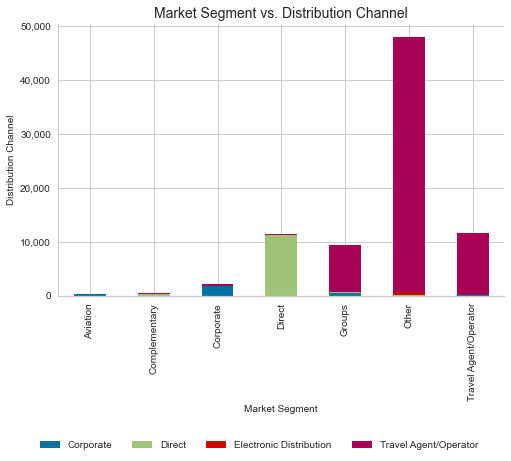

In [19]:
# Exploration of categorical variables: cross table of job and education
table1 = pd.crosstab(index=ds['MarketSegment'], columns=ds['DistributionChannel'])
table1

# Visual exploration of the cross table

# Draw
fig, ax = plt.subplots(figsize=(8,5))
table1.plot(kind="bar", 
            ax=ax,
            stacked=True)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Market Segment vs. Distribution Channel", fontsize=plots_Title_fontSize)
plt.xlabel("Market Segment")
plt.ylabel("Distribution Channel")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='lower center', 
          ncol=4, bbox_to_anchor=(0.45, -0.6), frameon=False)

<a class="anchor" id="2.4.">

## 2.4. Data Understanding Summary

The dataset has 83.590 observations and 31 features with 5 categorical and 26 numerical variables that have no duplicated data.
After performing the data expeloration and desciptive analysis through statistical summaries on the numerical data, we analysed the minimum values with the 25 percentile as well as the maximum values combined with the 75 percentile. These procedures combined with the data vizualizations gave us the following information:

- ID is a numerical column, starting at 1 going up to 83590 as the max value. 


- Categorical variables such as Nationality, Distribution Channel, Market Segment, Name & DocID Hash will not be considered for the clustering since the K-Means algorithm is not applicable to categorical data as categorical variables are discrete and do not have any natural origin. So computing the euclidean distance for such as space is not meaningful. 


- For the same reason as mentioned above we will also test the K-Means without the following features since the meaning is binary even though they have their datatype set as an integer: SRMediumFloor, SRBathTub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom.


- Age definitely seems to have outliers since the highest value is 122 and even the oldest person alive only makes it to 118. 


- DaysSinceCreation seems quite normally distributed and not having any very obvious outliers. 


- Duplicates on NameHash & DocIDHash in combination with ID could indicate a customer that has several entries in the dataset. This needs to be further checked.


- AverageLeadTime has a min value of -1 which must be further analyzed and meand and median vary quite strongly which is an indicatoin for outliers. 


- LodgingRevenue does probably have outliers in the positive direction which could be an indication for some VIP customers that can be addressed accordingly with special offers and services.


- OtherRevenue seems kind of similar to the LodgingRevenue, most liekly also having some outliers in high-spend.


- BookingsCanceled, BookingsNoShowed seem to have only small values with a max of 9 and 3. However, BookingsChedIn has a max of 66 days with a median of 1 which must be further invastigated.  


- PersonsNights and RoomNights also seem to be negatively skewed with high max values of 116 and 185. 


- DaysSinceLastStay and DaysSinceFirstStay have negative values which could be an indication af an IT error. Also, the numbers of the two features do not vary a lot from each other whcih could be interesting to further analyze if we are having a churn problem. The aim should be to have much higher values on DaysSinceFirstStay than on DaysSinceLastStay (currently an average of 401 vs. 403)

<a class="anchor" id="3.">

# 3.Data Preparation

After performing Data Understanding this Project will step up to the Data Preparation phase. In this phase, we are going to perform some useful commands as preprocessing tasks to prepare and clean the dataset. After this data preparation we will be able to better approach the clean data.

Following steps:

- Make copies of the original dataset;

- Coherence procedures and Missing Values

- Outliers and Skewness;

- Replace values and Data Cleaning;

- Normalizing and Feature Engineering

<a class="anchor" id="3.1">

## 3.1 Make a copy of the original dataset

In [20]:
#Do a copy of the dataset to proceed with the data transformation
ds1 = ds.copy(deep=True)
ds1.head()

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  51.0                150   
1   2         PRT   NaN               1095   
2   3         DEU  31.0               1095   
3   4         FRA  60.0               1095   
4   5         FRA  51.0               1095   

                                            NameHash  \
0  0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...   
1  0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...   
2  0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...   
3  0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...   
4  0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...   

                                           DocIDHash  AverageLeadTime  \
0  0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...               45   
1  0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...               61   
2  0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...                0   
3  0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...               93   
4  0xE175754CF77247B202DD0820F49407C762C14A603B3A...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
0           371.0         105.3                 1  ...              0   
1           280.0          53.0                 0  ...              0   
2             0.0           0.0                 0  ...              0   
3           240.0          60.0                 0  ...              0   
4             0.0           0.0                 0  ...              0   

   SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
0          0         0       0              0          0              0   
1          0         0       0              0          0              0   
2          0         0       0              0          0              0   
3          0         0       0              0          0              0   
4          0         0       0              0          0              0   

  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0                  0                     0            0  
1                  0                     0            0  
2                  0                     0            0  
3                  0                     0            0  
4                  0                     0            0  

[5 rows x 31 columns]

<a class="anchor" id="3.2">
    
## 3.2 Checking duplicated lines

Dealing with the duplicates in this project is slighlty different than the previous projects. There are no 2 rows (observations) that are completely similar (obvious duplicates). Therefore we decided to understand if there were more more than 1 visit by the same client, by using the Nationality, Name Hash and DocIDHash as the "filter", and if found, aggregate them into one observation. 

In [21]:
# Check duplicate values with hashed names
ds1.duplicated(keep='first', subset=['Nationality','NameHash', 'DocIDHash']).sum()

2341

In [22]:
ds1[ds1.duplicated(keep=False, subset=['Nationality','NameHash', 'DocIDHash'])]

ID Nationality   Age  DaysSinceCreation  \
30        31         PRT  39.0               1095   
32        33         PRT  41.0               1095   
35        36         PRT  63.0               1095   
122      123         PRT  41.0               1094   
402      403         FRA  38.0               1089   
...      ...         ...   ...                ...   
83445  83446         PRT  42.0                  1   
83446  83447         PRT  42.0                  1   
83458  83459         PRT  42.0                  1   
83502  83503         BRA  17.0                  0   
83503  83504         BRA  17.0                  0   

                                                NameHash  \
30     0xC24A218407111A34D6B511DC4352DB901B4F8F488C8C...   
32     0x3C9CF68D50FED7CD332CE483EDB9C594E8ECC82763A5...   
35     0x976A47F61434CAD5F6C6E475AB0D9A272F79D3865C8B...   
122    0x016F11562D0B2768F09DD51B23584B07BFE1EF495DD7...   
402    0x3380DF5FCFC5A1092B07E59366340CFDF1FC2278F3F7...   
...                                                  ...   
83445  0xA7CF19922BE11B6442D79722CD24A78E57F4D75D8ADB...   
83446  0xA7CF19922BE11B6442D79722CD24A78E57F4D75D8ADB...   
83458  0x033EBD4A48A612876437F32570040353459923D5D49C...   
83502  0xF71932292AFF4AC2270E02DF3B8A76C439515C7EF973...   
83503  0xF71932292AFF4AC2270E02DF3B8A76C439515C7EF973...   

                                               DocIDHash  AverageLeadTime  \
30     0x3333A7C8D1C059E0FA19CC75EE1E445546E362747838...                1   
32     0x23193A7BE94A4FD89517F55DDB4FE75B6D59F27BCB6F...                0   
35     0x53428199C7A936498730B0ABCE5B22097EE16E3B866B...                0   
122    0x428A0B30331DA53CBFFD23E890A0DB0243E959987453...                2   
402    0x5CA67D2F5BF3E70F1545DDE5A2561CB83942E6EBD834...               20   
...                                                  ...              ...   
83445  0x0DEE7ACC470D634F27D792210250966D184E9245A01E...                0   
83446  0x0DEE7ACC470D634F27D792210250966D184E9245A01E...                3   
83458  0x214B2BAB6C78DEA01C10D50D764B9B902212B780221A...                0   
83502  0x4AFF2B55EEFC7C76BC848E7DFBFCF01732A532971EA6...              143   
83503  0x4AFF2B55EEFC7C76BC848E7DFBFCF01732A532971EA6...                0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  ...  SRMediumFloor  \
30             1083.5        255.49                 0  ...              0   
32                0.0          0.00                 0  ...              0   
35                0.0          0.00                 0  ...              0   
122             404.5        473.30                 0  ...              0   
402             219.0         52.50                 0  ...              0   
...               ...           ...               ...  ...            ...   
83445             0.0          0.00                 0  ...              0   
83446             0.0          0.00                 0  ...              0   
83458             0.0          0.00                 0  ...              0   
83502           555.0         70.00                 0  ...              0   
83503             0.0          0.00                 0  ...              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed SRNearElevator  \
30             0         0       0              1          0              0   
32             0         0       0              0          0              0   
35             0         0       1              0          0              0   
122            0         0       1              1          0              0   
402            0         0       0              0          0              0   
...          ...       ...     ...            ...        ...            ...   
83445          0         0       0              0          0              0   
83446          0         0       0              0          0              0   
83458          0         0       0              1          0              0   
83502       

In the code above we can actually see that we do have some repeated clients showing up in our dataset (1,803 clients to be exact). We've decided to aggregate the repeated client's values of "Lodging Revenue" and "Other Revenue" into a single observation, keeping all the remaining variables identical to the first time they occurred which what we'll do below.

In [23]:
ds1 = ds1.groupby(['Nationality','NameHash','DocIDHash'], as_index=False).agg({'ID': 'first', 'Age': 'first', 'DaysSinceCreation': 'first', 'AverageLeadTime': 'first', 'LodgingRevenue': 'sum', 'OtherRevenue': 'sum', 'BookingsCanceled': 'first', 'BookingsNoShowed': 'first', 'BookingsCheckedIn': 'first', 'PersonsNights': 'first', 'RoomNights': 'first', 'DaysSinceLastStay': 'first', 'DaysSinceFirstStay': 'first', 'DistributionChannel': 'first', 'MarketSegment': 'first', 'SRHighFloor': 'first', 'SRLowFloor': 'first', 'SRAccessibleRoom': 'first', 'SRMediumFloor': 'first', 'SRBathtub': 'first', 'SRShower': 'first', 'SRCrib': 'first', 'SRKingSizeBed': 'first', 'SRTwinBed': 'first', 'SRNearElevator': 'first', 'SRAwayFromElevator': 'first', 'SRNoAlcoholInMiniBar': 'first', 'SRQuietRoom': 'first'})

In [24]:
ds1.describe(include='all').T

count unique  \
Nationality             81249    188   
NameHash                81249  80642   
DocIDHash               81249  76993   
ID                    81249.0    NaN   
Age                   77822.0    NaN   
DaysSinceCreation     81249.0    NaN   
AverageLeadTime       81249.0    NaN   
LodgingRevenue        81249.0    NaN   
OtherRevenue          81249.0    NaN   
BookingsCanceled      81249.0    NaN   
BookingsNoShowed      81249.0    NaN   
BookingsCheckedIn     81249.0    NaN   
PersonsNights         81249.0    NaN   
RoomNights            81249.0    NaN   
DaysSinceLastStay     81249.0    NaN   
DaysSinceFirstStay    81249.0    NaN   
DistributionChannel     81249      4   
MarketSegment           81249      7   
SRHighFloor           81249.0    NaN   
SRLowFloor            81249.0    NaN   
SRAccessibleRoom      81249.0    NaN   
SRMediumFloor         81249.0    NaN   
SRBathtub             81249.0    NaN   
SRShower              81249.0    NaN   
SRCrib                81249.0    NaN   
SRKingSizeBed         81249.0    NaN   
SRTwinBed             81249.0    NaN   
SRNearElevator        81249.0    NaN   
SRAwayFromElevator    81249.0    NaN   
SRNoAlcoholInMiniBar  81249.0    NaN   
SRQuietRoom           81249.0    NaN   

                                                                    top  \
Nationality                                                         FRA   
NameHash              0xCAEF420C4AC689F5FFE9B63D4A965015152ED6CBD1B4...   
DocIDHash             0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   
ID                                                                  NaN   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DaysSinceLastStay                                                   NaN   
DaysSinceFirstStay                                                  NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq          mean          std   min      25%  \
Nationality           12244           NaN          NaN   NaN      NaN   
NameHash                  6           NaN          NaN   NaN      NaN   
DocIDHash              3315           NaN          NaN   NaN      NaN   
ID                      NaN  41671.234563  24115.1

In [25]:
ds1.duplicated(keep='first', subset=['Nationality','NameHash', 'DocIDHash']).sum()

0

As we can see from the code above we now have no duplicates when grouping the Nationality, Name Hash and DocIDHash, and we've successfully aggragated the repeated observations into the same row and can now proceed.

As another part of the clean-up process that follows the removal of duplicates (by aggregation) we've also decided to remove clients (observations) that have not produced any income to busines (either Lodging or Other). We believe these clients hold no real value to the hotel business as they have not contributed in any significant way and therefore won't be useful to the clustering.

In [26]:
ds1.LodgingRevenue.value_counts()[0]

19778

In [27]:
ds1.OtherRevenue.value_counts()[0]

19607

In [28]:
ds1 = ds1[(ds1['LodgingRevenue'] != 0) & (ds1['OtherRevenue'] != 0)]

In [29]:
ds1.describe(include='all').T

count unique  \
Nationality             61463    177   
NameHash                61463  60963   
DocIDHash               61463  58287   
ID                    61463.0    NaN   
Age                   58855.0    NaN   
DaysSinceCreation     61463.0    NaN   
AverageLeadTime       61463.0    NaN   
LodgingRevenue        61463.0    NaN   
OtherRevenue          61463.0    NaN   
BookingsCanceled      61463.0    NaN   
BookingsNoShowed      61463.0    NaN   
BookingsCheckedIn     61463.0    NaN   
PersonsNights         61463.0    NaN   
RoomNights            61463.0    NaN   
DaysSinceLastStay     61463.0    NaN   
DaysSinceFirstStay    61463.0    NaN   
DistributionChannel     61463      4   
MarketSegment           61463      7   
SRHighFloor           61463.0    NaN   
SRLowFloor            61463.0    NaN   
SRAccessibleRoom      61463.0    NaN   
SRMediumFloor         61463.0    NaN   
SRBathtub             61463.0    NaN   
SRShower              61463.0    NaN   
SRCrib                61463.0    NaN   
SRKingSizeBed         61463.0    NaN   
SRTwinBed             61463.0    NaN   
SRNearElevator        61463.0    NaN   
SRAwayFromElevator    61463.0    NaN   
SRNoAlcoholInMiniBar  61463.0    NaN   
SRQuietRoom           61463.0    NaN   

                                                                    top  \
Nationality                                                         FRA   
NameHash              0xCAEF420C4AC689F5FFE9B63D4A965015152ED6CBD1B4...   
DocIDHash             0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...   
ID                                                                  NaN   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DaysSinceLastStay                                                   NaN   
DaysSinceFirstStay                                                  NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq          mean          std   min      25%  \
Nationality            9228           NaN          NaN   NaN      NaN   
NameHash                  6           NaN          NaN   NaN      NaN   
DocIDHash              2497           NaN          NaN   NaN      NaN   
ID                      NaN  35832.342352  22809.2

Because of the nature of the data (numerical) we've used the bit operation (&) to apply an AND clause. This was useful as we wanted to elimante clients (observations) that have not produced Revenue from either source. Altough the resulting dataset is substantially smaller (a decrease of about 24% of the dataset), it's our belief that this reduced dataset is where we can actually find the most value for the Clustering.

In a practical scenario we would analyse these clients who have not spent any money with us sepparately to try to predict what causes potential clients to create a booking and not follow through.

<a class="anchor" id="3.3">
    
## 3.3 Missing Values Treatment

In [30]:
#Check Missing values- create table
def missing_values_table(x):
        mv = x.isna().sum()
        mv_pct = 100 * x.isna().sum() / len(x)
        mv_table = pd.concat([mv, mv_pct], axis=1)
        mv_table = mv_table.rename(
        columns = {0: 'Nº of Missing Values', 1: '% of Missing Values'})
        mv_table = mv_table[
            mv_table.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        return mv_table

missing_values_table(ds1)

Nº of Missing Values  % of Missing Values
Age                  2608                  4.2

In [31]:
# Replace age missing values by median
ds1= ds1.fillna(ds1.median(numeric_only=True))
ds1.isna().sum()

Nationality             0
NameHash                0
DocIDHash               0
ID                      0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

Because the variable Age already presents a Fairly Normal Distribution we've decided that imputing the missing values with the Median would be an effective way of dealing with the them and at the same time not affecting the "veracity" of the data in any significant way.

In [32]:
# Display info
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61463 entries, 0 to 81248
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           61463 non-null  object 
 1   NameHash              61463 non-null  object 
 2   DocIDHash             61463 non-null  object 
 3   ID                    61463 non-null  int64  
 4   Age                   61463 non-null  float64
 5   DaysSinceCreation     61463 non-null  int64  
 6   AverageLeadTime       61463 non-null  int64  
 7   LodgingRevenue        61463 non-null  float64
 8   OtherRevenue          61463 non-null  float64
 9   BookingsCanceled      61463 non-null  int64  
 10  BookingsNoShowed      61463 non-null  int64  
 11  BookingsCheckedIn     61463 non-null  int64  
 12  PersonsNights         61463 non-null  int64  
 13  RoomNights            61463 non-null  int64  
 14  DaysSinceLastStay     61463 non-null  int64  
 15  DaysSinceFirstStay 

<a class="anchor" id="3.4">
    
## 3.4 Set an Index

In [33]:
ds1 = ds1.set_index('ID')

In [34]:
ds1 = ds1.sort_index(ascending=False)

Because we should never use ID in Clustering we've decided to keep indexing the ID variable so that we can keep the unique identifiers for further analysis and profiling of necessary.

<a class="anchor" id="3.5">
    
## 3.5 Outliers Treatment

In [35]:
ds1.shape

(61463, 30)

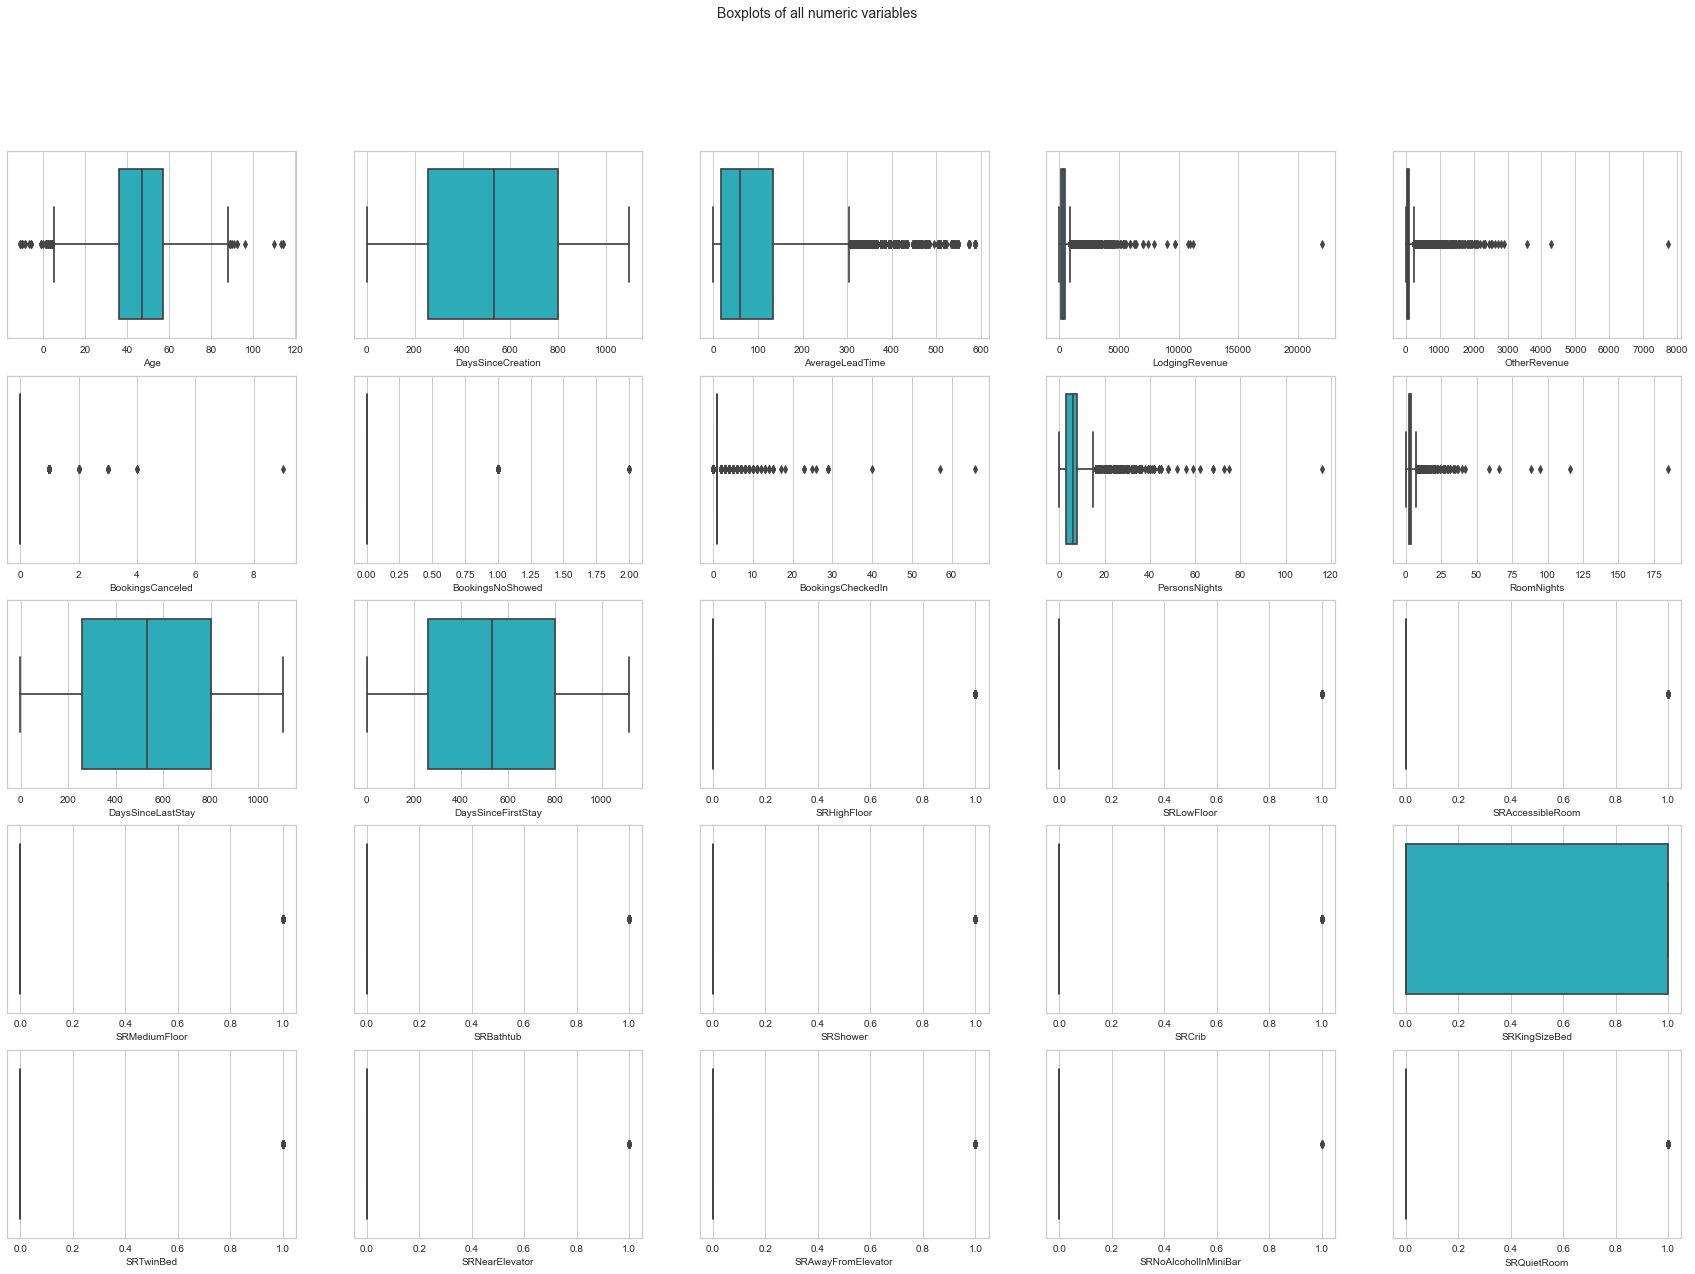

In [36]:
#Boxplots to check outliers
numerical=ds1.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(5, 5, figsize = (30,20))
for var, subplot in zip(ds1[numerical], ax.flatten()):
    g = sns.boxplot(data = ds1,
                 x = var,
                 color = '#17becf',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);


#### Age

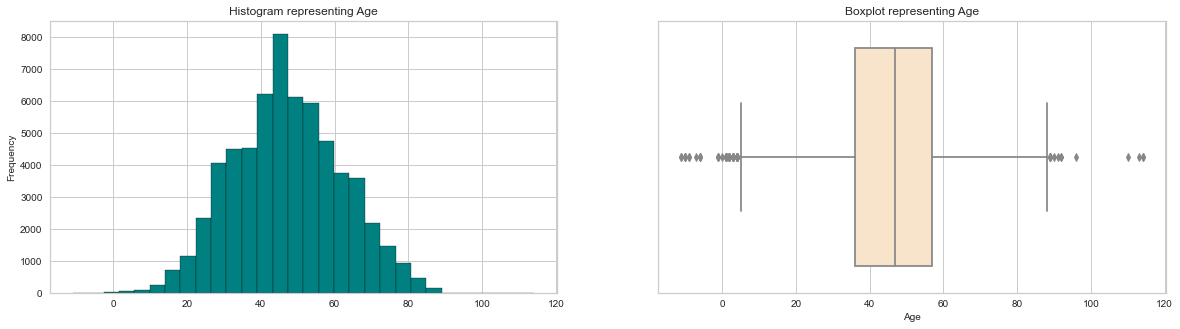

In [37]:
#Check the distribution of the variable Age for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["Age"], data=ds1, color = 'bisque',ax = ax[1])
ds1["Age"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Age', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing Age')
ax[0].title.set_text('Histogram representing Age')

In [38]:
#Remove Outliers
outliers = ds1[(ds1.Age <0)].copy()
ds1 = ds1[(ds1.Age >0 ) | (ds1.Age.isnull())]

In [39]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 16 observations from dataset, that is 0.02603192164391585% of the observations.


In [40]:
#Remove Outliers
outliers = ds1[(ds1.Age >100)].copy()
ds1 = ds1[(ds1.Age <100 ) | (ds1.Age.isnull())]

In [41]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 20 observations from dataset, that is 0.03253990205489481% of the observations.


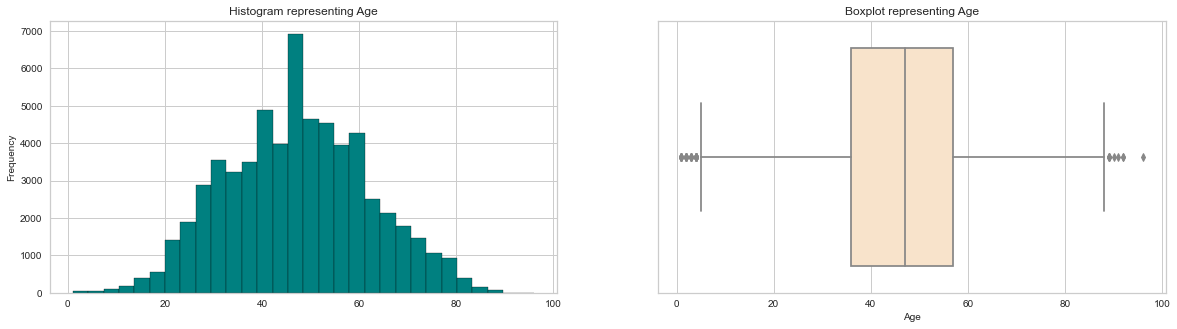

In [42]:
#Check the distribution of the variable Age for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["Age"], data=ds1, color = 'bisque',ax = ax[1])
ds1["Age"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Age', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing Age')
ax[0].title.set_text('Histogram representing Age')

With the variable Age we decided to remove any observation below 0 and keep the observations between 0 and 1 because, in our understanding, it may make sense to have collected data about babys with an age between 0 and 1 (baby with months) but it does not make sense to register as a client/guest someone with negative values in this variable. Regarding the upper outliers, we decided to eliminate only the observations above 100 for we consider these as extreme outliers and any observation above even representing an high value such as 90 or 100 does not seem to affect the gaussian distribution we are aiming for.

#### LodgingRevenue

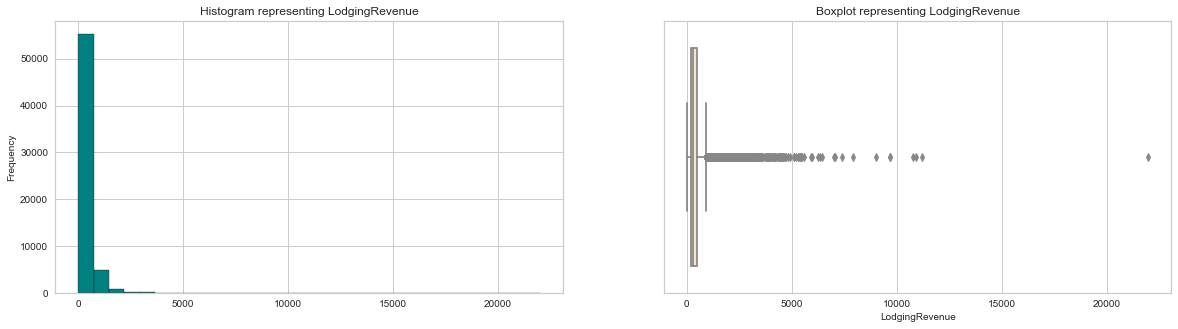

In [43]:
#Check the distribution of the variable LodgingRevenue for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["LodgingRevenue"], data=ds1, color = 'bisque',ax = ax[1])
ds1["LodgingRevenue"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'LodgingRevenue', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing LodgingRevenue')
ax[0].title.set_text('Histogram representing LodgingRevenue')

In [44]:
#Remove Outliers
outliers = ds1[(ds1.LodgingRevenue >2900)].copy()
ds1 = ds1[(ds1.LodgingRevenue <2900 ) | (ds1.LodgingRevenue.isnull())]

In [45]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 203 observations from dataset, that is 0.33028000585718237% of the observations.


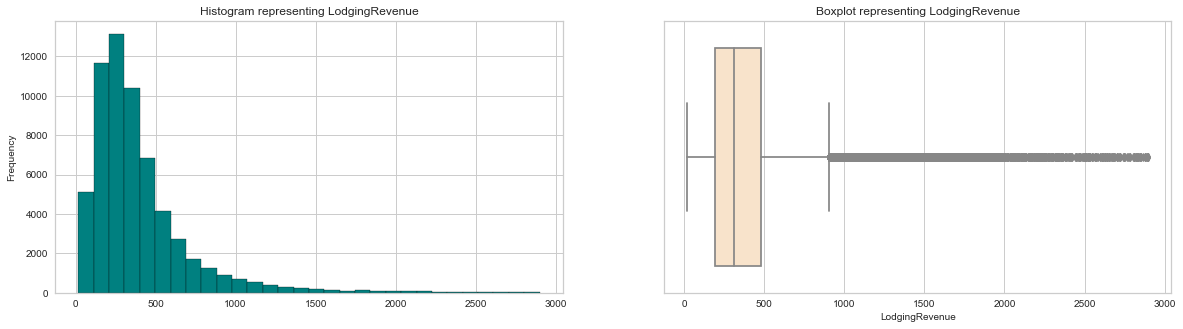

In [46]:
#Check the distribution of the variable LodgingRevenue for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["LodgingRevenue"], data=ds1, color = 'bisque',ax = ax[1])
ds1["LodgingRevenue"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'LodgingRevenue', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing LodgingRevenue')
ax[0].title.set_text('Histogram representing LodgingRevenue')

With the variable LodgingRevenue we started by eliminating the most obvious outliers from 6000 onwards and after rechecking them we deleted once again the most extreme outliers, getting us to delete observations above 2900. Deliting more observations did not seem to make sense for us, since the rest of the observations considered as outliers represent a big portion of the variable and appear to be close to each other- meaning that even though representing high values, they still seem to represent the reality instead of the exception. 

#### OtherRevenue

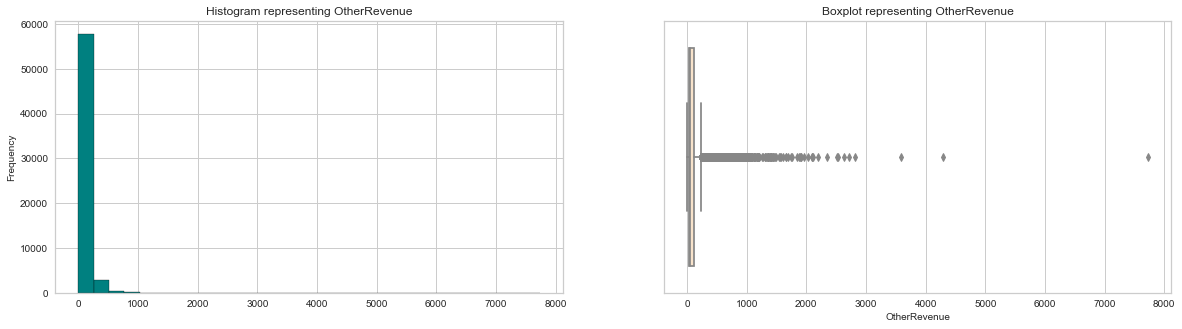

In [47]:
#Check the distribution of the variable OtherRevenue for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["OtherRevenue"], data=ds1, color = 'bisque',ax = ax[1])
ds1["OtherRevenue"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'OtherRevenue', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing OtherRevenue')
ax[0].title.set_text('Histogram representing OtherRevenue')

In [48]:
#Remove Outliers
outliers = ds1[(ds1.OtherRevenue >800)].copy()
ds1 = ds1[(ds1.OtherRevenue <800 ) | (ds1.OtherRevenue.isnull())]

In [49]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 395 observations from dataset, that is 0.6426630655841725% of the observations.


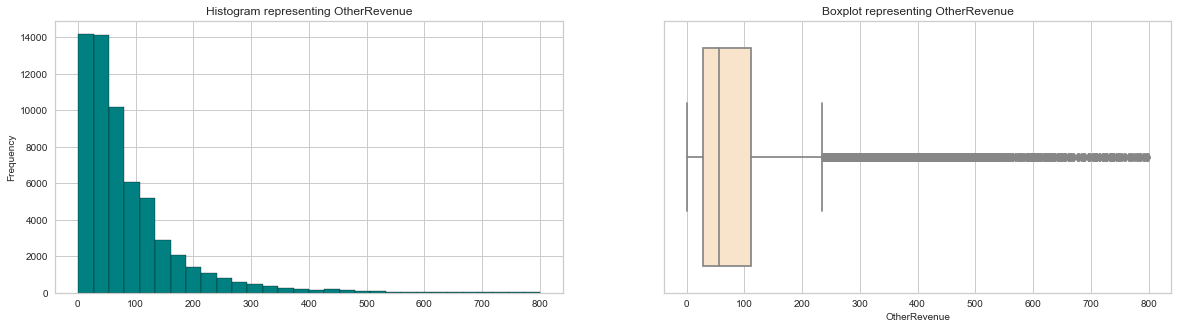

In [50]:
#Check the distribution of the variable OtherRevenue for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["OtherRevenue"], data=ds1, color = 'bisque',ax = ax[1])
ds1["OtherRevenue"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'OtherRevenue', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing OtherRevenue')
ax[0].title.set_text('Histogram representing OtherRevenue')

With the variable OtherRevenue we had a similiar "behaviour" in the observations and thus the approuch was similiar. We deleted the most obvious ouliers- from 3000 onwards- and realized that until the observations with the value 800 we could delete outliers taking in consideration their distance from all the other observations and the percentage of the dataset they represented. Deliting more observations did not seem to make sense for us, since the rest of the observations considered as outliers represent a big portion of the variable and appear to be close to each other- meaning that even though representing high values, they still seem to represent the reality instead of the exception. 

#### PersonsNights

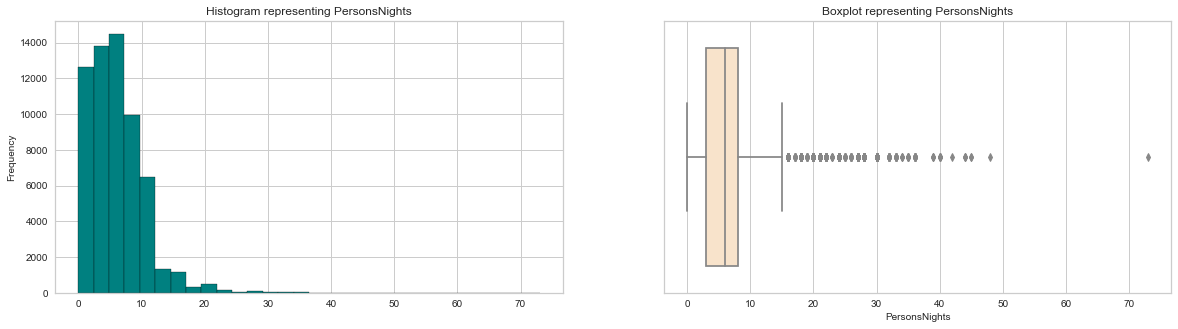

In [51]:
#Check the distribution of the variable PersonsNights for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["PersonsNights"], data=ds1, color = 'bisque',ax = ax[1])
ds1["PersonsNights"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'PersonsNights', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing PersonsNights')
ax[0].title.set_text('Histogram representing PersonsNights')

In [52]:
#Remove Outliers
outliers = ds1[(ds1.PersonsNights >23)].copy()
ds1 = ds1[(ds1.PersonsNights <23) | (ds1.PersonsNights.isnull())]

In [53]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 743 observations from dataset, that is 1.2088573613393423% of the observations.


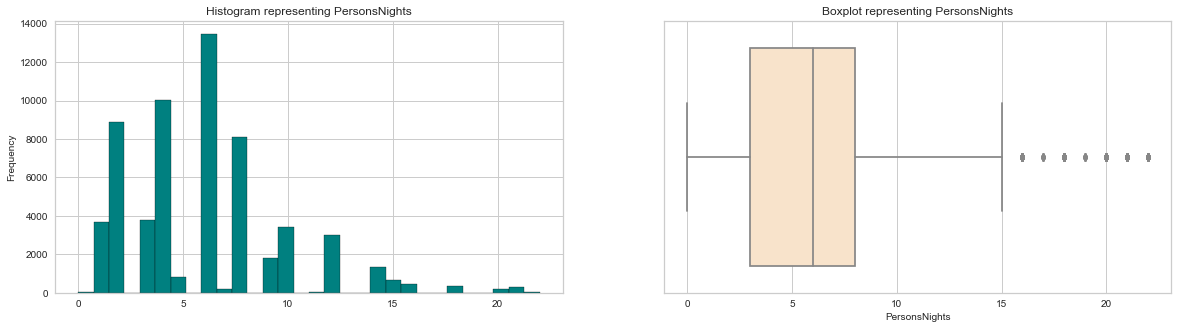

In [54]:
#Check the distribution of the variable PersonsNights for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["PersonsNights"], data=ds1, color = 'bisque',ax = ax[1])
ds1["PersonsNights"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'PersonsNights', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing PersonsNights')
ax[0].title.set_text('Histogram representing PersonsNights')

With the PersonsNights variable the approach was once again to delete the observations that represented a bigger dinstance/ pattern break regarding the rest of the observations and thus we started by eliminating any records above 29 and we realized that we could delete any observation above the value 23 without deleting too much data and keeping this not so extreme outliers that seem to have the same distance/pattern between themselves.

#### RoomNights

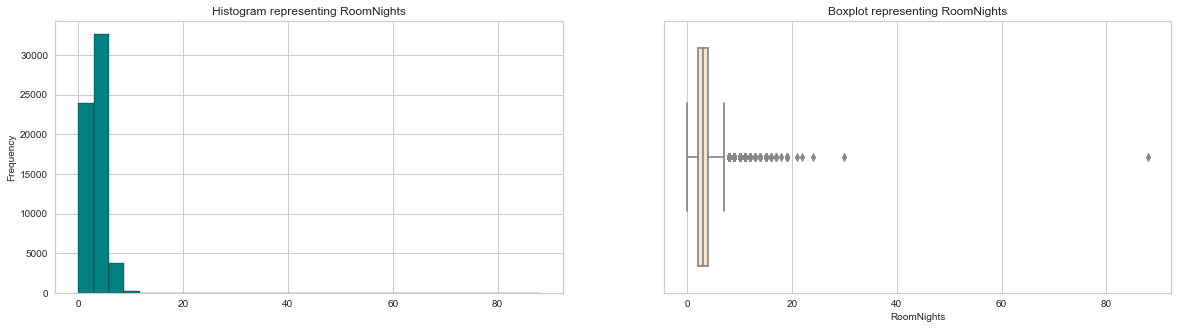

In [55]:
#Check the distribution of the variable RoomNights for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["RoomNights"], data=ds1, color = 'bisque',ax = ax[1])
ds1["RoomNights"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'RoomNights', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing RoomNights')
ax[0].title.set_text('Histogram representing RoomNights')

In [56]:
#Remove Outliers
outliers = ds1[(ds1.RoomNights >15)].copy()
ds1 = ds1[(ds1.RoomNights <15) | (ds1.RoomNights.isnull())]

In [57]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 777 observations from dataset, that is 1.2641751948326636% of the observations.


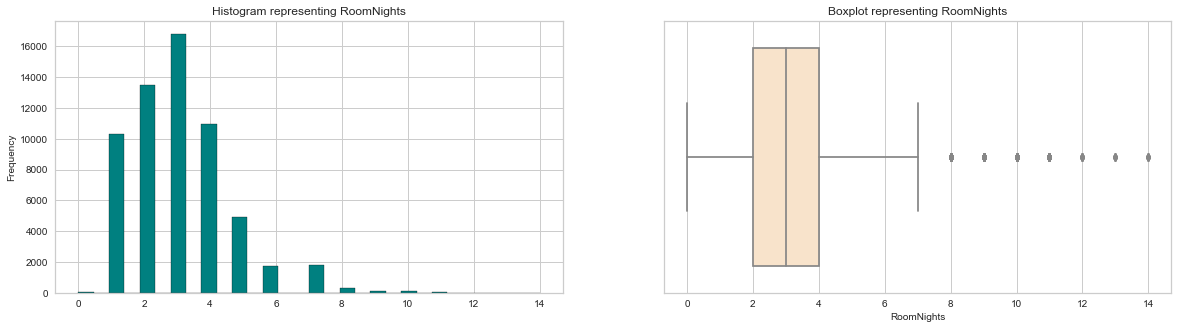

In [58]:
#Check the distribution of the variable RoomNights for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["RoomNights"], data=ds1, color = 'bisque',ax = ax[1])
ds1["RoomNights"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'RoomNights', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing RoomNights')
ax[0].title.set_text('Histogram representing RoomNights')

In [59]:
#Check how many times value 8 appears in RoomNights
from collections import Counter
RoomNights=ds1['RoomNights']
RoomNights_counts = Counter(RoomNights)

print(f'"The value 8" appears {RoomNights_counts[8]} time(s)')

"The value 8" appears 280 time(s)


With the variable RoomNights we followed the same approach as in the variable PersonsNights, reaching the conclusion that we could eliminate any observation above the value 15 without deliting to many observations within the variable.

#### AverageLeadTime

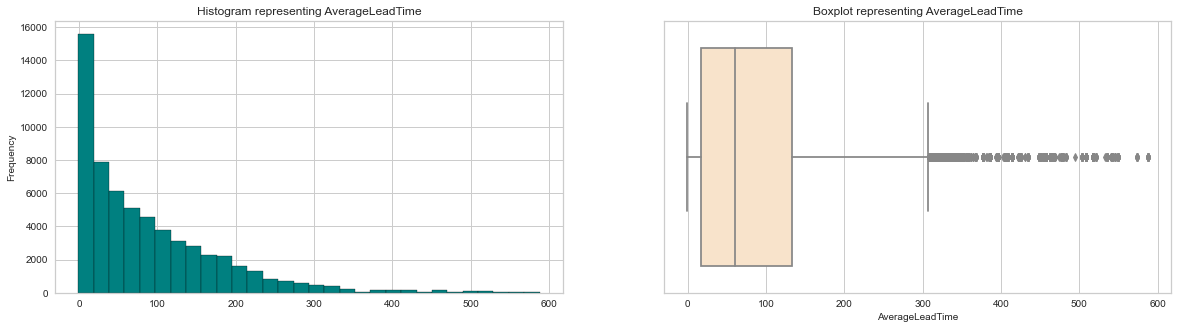

In [60]:
#Check the distribution of the variable AverageLeadTime for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["AverageLeadTime"], data=ds1, color = 'bisque',ax = ax[1])
ds1["AverageLeadTime"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'AverageLeadTime', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing AverageLeadTime')
ax[0].title.set_text('Histogram representing AverageLeadTime')

In [61]:
#Remove Outliers
outliers = ds1[(ds1.AverageLeadTime >370)].copy()
ds1 = ds1[(ds1.AverageLeadTime <370) | (ds1.AverageLeadTime.isnull())]

In [62]:
#Check how much data was deleted
print("We deleted " + str(61463 - ds1.shape[0]) + " observations from dataset, that is " + str(((61463 - ds1.shape[0])/61463)*100) + "% of the observations.")

We deleted 1800 observations from dataset, that is 2.928591184940533% of the observations.


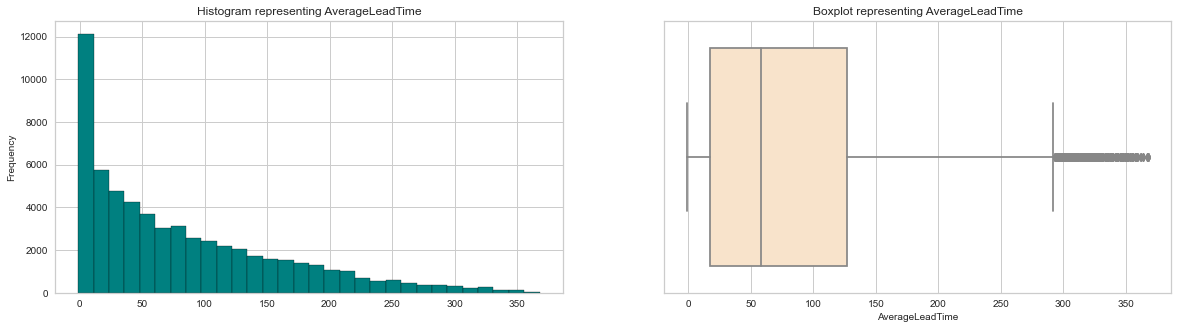

In [63]:
#Check the distribution of the variable AverageLeadTime for outliers
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=ds1["AverageLeadTime"], data=ds1, color = 'bisque',ax = ax[1])
ds1["AverageLeadTime"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'AverageLeadTime', 
                      color = '#008080',
                      ec = 'black', ax=ax[0])
ax[1].title.set_text('Boxplot representing AverageLeadTime')
ax[0].title.set_text('Histogram representing AverageLeadTime')

Finally with AverageLeadTime, following the same rational, we deleted any observation above the value 370 as deliting more observations did not seem to make sense for us, since the rest of the observations considered as outliers represent a big portion of the variable and appear to be close to each other- meaning that even though representing high values, they still seem to represent the reality instead of the exception. 

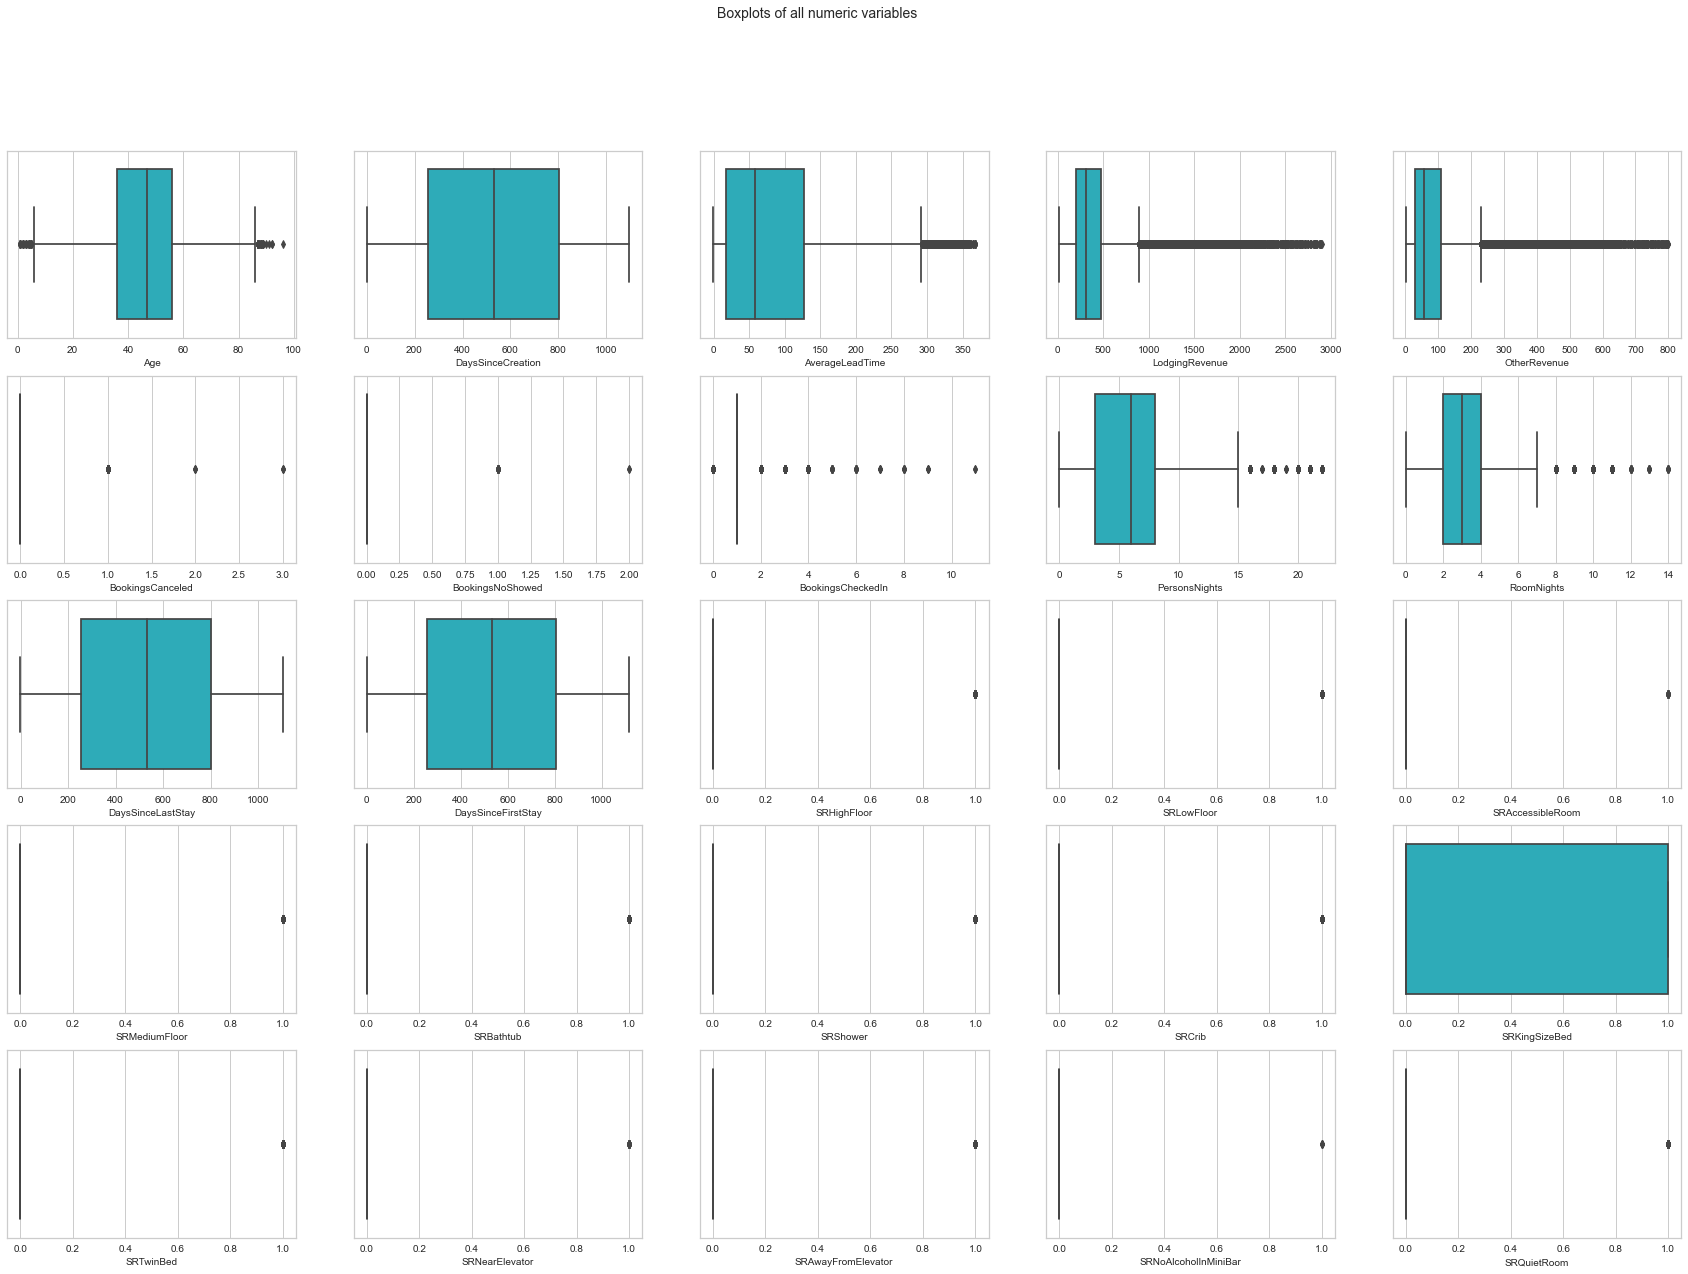

In [64]:
#Boxplots to check outliers
numerical=ds1.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(5, 5, figsize = (30,20))
for var, subplot in zip(ds1[numerical], ax.flatten()):
    g = sns.boxplot(data = ds1,
                 x = var,
                 color = '#17becf',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);


In [65]:
#Check how much data was deleted in Total since the beginning of the Data Preparation
print("We deleted in Total " + str(83590 - ds1.shape[0]) + " observations from the original dataset, that is " + str(((83590 - ds1.shape[0])/83590)*100) + "% of the observations.")

We deleted in Total 23927 observations from the original dataset, that is 28.62423734896519% of the observations.


In [66]:
ds1.shape

(59663, 30)

After finishing the outliers removal, we deleted 1800 observations from dataset, representing 2.93% of the observations. At this stage of the project we ended up deliting a total of 23927 observations from the original dataset, representing 28.62% of the observations, mostly by deliting any observation from a client that would represent 0 revenue for the Hotel, considiring both the variable LodgingRevenue and OtherRevenue, for we consider that this clients in a first marketing approach do not represent any value for this analysis and further clustering- We consider that the first marketing approach should be concerned about the clients that the hotel really wants to target and not the ones it should avoid (from a purely business strategy point of view).

<a class="anchor" id="3.6">
    
## 3.6 Skewness

Skew = 0 - Normal Distribution; Skew < 0 - Negative/Left Skewness - if we have outliers they will most likely be on the left side and the right side will have more observations; Skew > 0 - Positive/Right Skewness - if we have outliers they will most likely be on the right side and the left side will have more observations.

In [67]:
#Checking skewness and kurtosis
ds1.agg(['skew', 'kurtosis']).transpose()

skew      kurtosis
Age                     0.057547     -0.331660
DaysSinceCreation       0.010975     -1.215079
AverageLeadTime         1.099862      0.580362
LodgingRevenue          2.752702     11.417950
OtherRevenue            2.783407     11.284199
BookingsCanceled       42.851163   2332.492724
BookingsNoShowed       57.846295   3755.607183
BookingsCheckedIn      16.615385    441.037633
PersonsNights           1.086700      1.426500
RoomNights              1.012950      1.932867
DaysSinceLastStay       0.015266     -1.213839
DaysSinceFirstStay      0.009624     -1.213929
SRHighFloor             4.345060     16.880111
SRLowFloor             27.782805    769.910069
SRAccessibleRoom       57.548049   3309.888889
SRMediumFloor          34.852176   1212.714795
SRBathtub              18.879523    354.448257
SRShower               24.005898    574.302385
SRCrib                 10.251818    103.103224
SRKingSizeBed           0.635023     -1.596800
SRTwinBed               2.121975      2.502862
SRNearElevator         53.275119   2836.333381
SRAwayFromElevator     16.377199    266.221566
SRNoAlcoholInMiniBar  109.225455  11928.599826
SRQuietRoom             2.886518      6.332200

In [68]:
#Checking skewness and kurtosis of non-boolean variables
cols = ['AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights']
ds1[cols].agg(['skew', 'kurtosis']).transpose()

skew   kurtosis
AverageLeadTime  1.099862   0.580362
LodgingRevenue   2.752702  11.417950
OtherRevenue     2.783407  11.284199
PersonsNights    1.086700   1.426500

#### Histograms on all variables with skewness above moderate (> -0.5/< 0.5) to check distribution

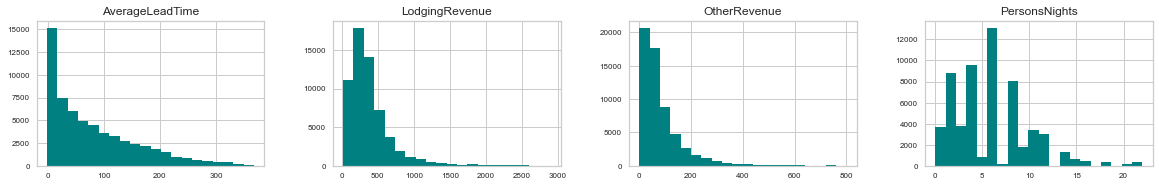

In [69]:
cols = ['AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights']
ds1[cols].hist(bins=20, figsize=(20, 20), layout=(6, 4), xlabelsize=8, color ='#008080', ylabelsize=8);

#### CubeRoot transformation for variable AverageLeadTime with a high positive skew
We´ve used the Cube Root in this variable because there are several observations with a 0 value, which makes it impossible to use the more usual Log transformation.

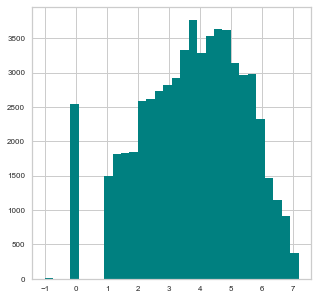

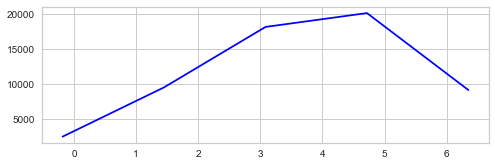

In [70]:
ds1['AverageLeadTime_tr'] = np.cbrt(ds1['AverageLeadTime'])

ds1['AverageLeadTime_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#008080', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(ds1['AverageLeadTime_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

#### Log transformation for variable LodgingRevenue with a high positive skew
We´ve used the typical Log transformation in this variable because of the high positive skewness.

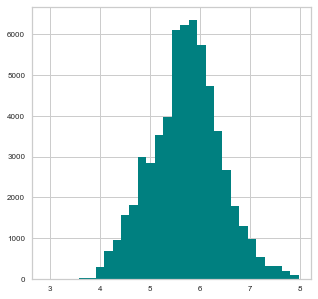

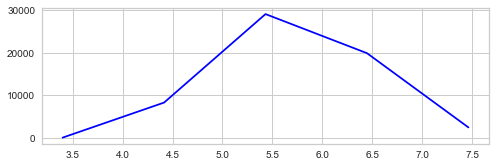

In [71]:
ds1['LodgingRevenue_tr'] = np.log(ds1['LodgingRevenue'])

ds1['LodgingRevenue_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#008080', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(ds1['LodgingRevenue_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

#### Log transformation for variable OtherRevenue with a high positive skew
We´ve used the typical Log transformation in this variable because of the high positive skewness.

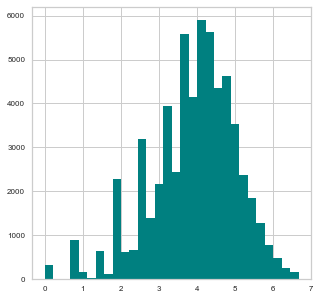

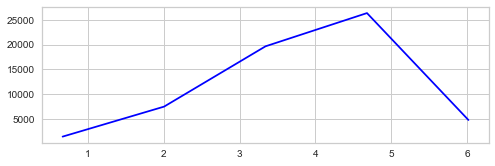

In [72]:
ds1['OtherRevenue_tr'] = np.log(ds1['OtherRevenue'])

ds1['OtherRevenue_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#008080', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(ds1['OtherRevenue_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

#### CubeRoot transformation for variable PersonsNights with a high positive skew
We´ve used the Cube Root in this variable because there are several observations with a 0 value, which makes it impossible to use the more usual Log transformation.

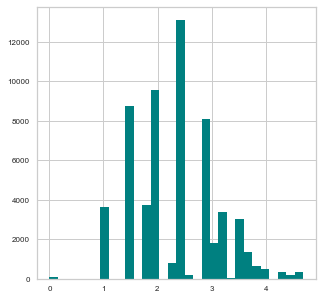

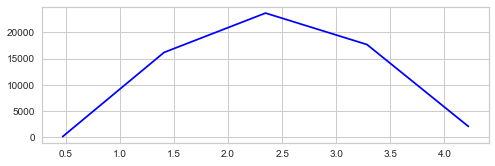

In [73]:
ds1['PersonsNights_tr'] = np.sqrt(ds1['PersonsNights'])

ds1['PersonsNights_tr'].hist(bins=30, figsize=(5, 5), xlabelsize=8,color ='#008080', ylabelsize=8)
plt.show()
plt.subplot(212)
y, binEdges = np.histogram(ds1['PersonsNights_tr'], bins=5)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='blue')
plt.show()

In [74]:
#Checking produced result of skewness and kurtosis of non-boolean variables
cols = ['AverageLeadTime_tr', 'LodgingRevenue_tr', 'OtherRevenue_tr', 'PersonsNights_tr']
ds1[cols].agg(['skew', 'kurtosis']).transpose()

skew  kurtosis
AverageLeadTime_tr -0.318174 -0.531493
LodgingRevenue_tr   0.027256  0.029860
OtherRevenue_tr    -0.663916  0.709076
PersonsNights_tr    0.257288 -0.231460

The result of the transformation shows a vast improvement in comparison to the original variables and will therefore be used in the Clustering instead of the original variables.

<a class="anchor" id="3.7">
    
## 3.7 Feature Selection

In this section we aim to simplify the analysis of the variable Nationality by reducing the Cardinality substantially. We chose to group all the different countries into their original Continents, creating a variable that now has only 6 unique values.

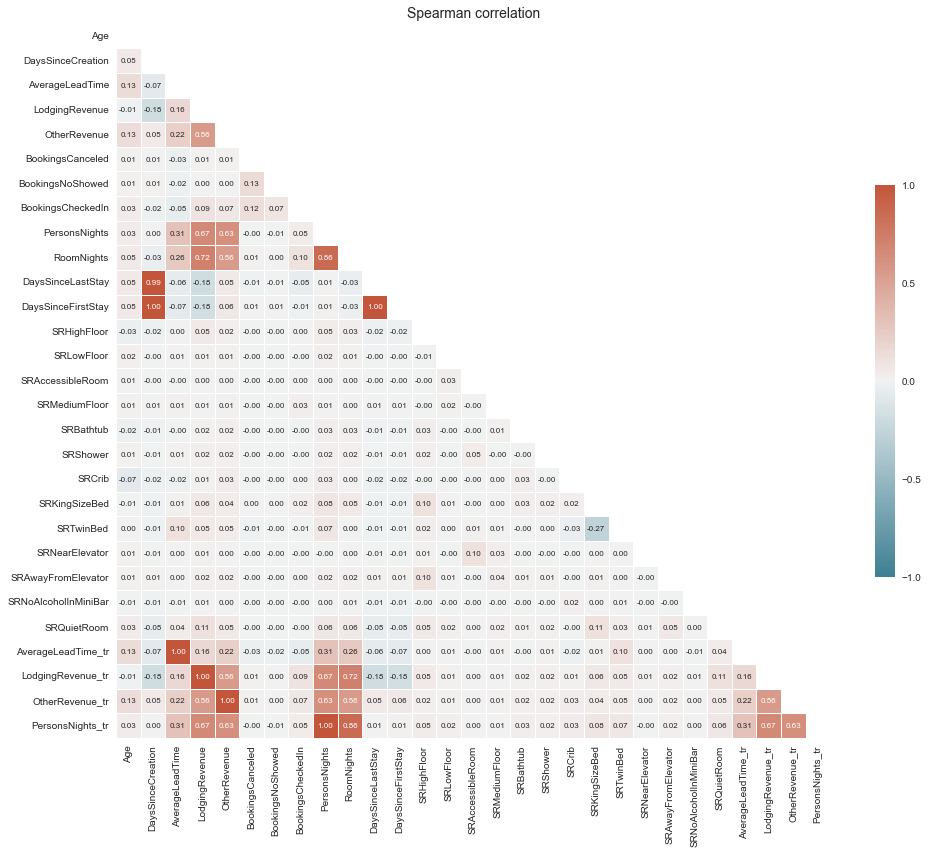

In [75]:
#Create correlation matrix
corr = ds1.corr(method = 'spearman')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#Draw
cmap = sns.diverging_palette(220, 20, as_cmap = True) #aqui da para mudar a cor
fig , ax = plt.subplots(figsize = (16, 18))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = cmap,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt = '.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})
                      

#Decoration
plt.title("Spearman correlation", fontsize = plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [76]:
#!pip install pycountry
#!pip install pycountry-convert

# for Visual Studio Code
%pip install pycountry
%pip install pycountry-convert

# add country code to dataset to have country as number

import pandas as pd
import pycountry

# Helper function to map country alpha_3 to to numeric code representation - RB
def lookup_country_code(country):
    try:
        return pycountry.countries.lookup(country).numeric
    except LookupError:
        return country

ds1['Country_Code'] = ds1.apply(lambda row: lookup_country_code(row['Nationality']), axis=1)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [77]:
ds1.head(10)


Nationality                                           NameHash  \
ID                                                                     
83589         IRL  0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...   
83587         IRL  0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...   
83585         ITA  0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...   
83583         FRA  0x92C604CF82CF16CB1BD33732B537F86D007B7BC48C8C...   
83581         DEU  0x98FF1A89EAFB3D2A757C073C0FB89647DD33EDB97B8D...   
83578         PRT  0x445EC0600025112A877986E6C2FCE2421AAB08578385...   
83575         FRA  0x7A07F413A66AFD26910FEEC82AF0365F7EF7CF4C2B4C...   
83573         PRT  0xF25E7C76CF20096907E6ED7194E8DEB15704E24A01E3...   
83571         FRA  0x5598BECAB023502FD86B8F01D312572CA9FF5EDADF41...   
83569         JPN  0x8AED3FE214389037ADE25161904027A36C946AC220D5...   

                                               DocIDHash   Age  \
ID                                                               
83589  0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...  85.0   
83587  0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...  47.0   
83585  0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...  52.0   
83583  0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...  49.0   
83581  0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...  48.0   
83578  0xF64E6D2C52B1B1336C0D0C56622FC61D075B825CE203...  41.0   
83575  0xACAE92FC1805757D6021EE4379B8858D09ED3A3E2BBA...   3.0   
83573  0x5ACFAF1D0E787A4698BA8AEEB92A90114A95D5B46CCB...  33.0   
83571  0xBDF0BE2274B728525876828177F4BCDF76B7035A44FF...  35.0   
83569  0x4E87EE96362347795B8CF1863C6D1699CE5EBD9438C4...  30.0   

       DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
ID                                                                        
83589                  0              109          981.30          9.00   
83587                  0              109          327.10        277.50   
83585                  0              116          336.90        105.50   
83583                  0               91          143.00          2.00   
83581                  0               20          176.00        147.00   
83578                  0                3          180.00         68.00   
83575                  0               93          358.00        108.00   
83573                  0               93          252.00        200.00   
83571                  0              107          190.40          4.00   
83569                  0                1          232.88        109.75   

       BookingsCanceled  BookingsNoShowed  ...  SRTwinBed  SRNearElevator  \
ID                                         ...                              
83589                 0                 0  ...          1               0   
83587                 0                 0  ...          0               0   
83585                 0                 0  ...          0               0   
83583                 0                 0  ...          0               0   
83581                 0                 0  ...          0               0   
83578                 0                 0  ...          0               0   
83575                 0                 0  ...          0               0   
83573                 0                 0  ...          0               0   
83571                 0                 0  ...          0               0   
83569                 0                 0  ...          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  \
ID                                                             
83589                   0                     0            0   
83587                   0                     0            0   
83585                   0                     0            0   
83583                   0                     0            0   
83581                   0                     0            0   
83578                   0                     0            0   
83575     

In [78]:
# Helper function to map country alpha_3 to to alpha2_ to later on transfor to continent - RB

import pandas as pd
import pycountry

# Helper function to map country alpha_3 to to alpha2_ to later on transfor to continent - RB
def lookup_country_code(country):
    try:
        return pycountry.countries.lookup(country).alpha_2
    except LookupError:
        return country

ds1['Country_Alpha2'] = ds1.apply(lambda row: lookup_country_code(row['Nationality']), axis=1)

In [79]:
ds1.head(10)

Nationality                                           NameHash  \
ID                                                                     
83589         IRL  0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...   
83587         IRL  0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...   
83585         ITA  0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...   
83583         FRA  0x92C604CF82CF16CB1BD33732B537F86D007B7BC48C8C...   
83581         DEU  0x98FF1A89EAFB3D2A757C073C0FB89647DD33EDB97B8D...   
83578         PRT  0x445EC0600025112A877986E6C2FCE2421AAB08578385...   
83575         FRA  0x7A07F413A66AFD26910FEEC82AF0365F7EF7CF4C2B4C...   
83573         PRT  0xF25E7C76CF20096907E6ED7194E8DEB15704E24A01E3...   
83571         FRA  0x5598BECAB023502FD86B8F01D312572CA9FF5EDADF41...   
83569         JPN  0x8AED3FE214389037ADE25161904027A36C946AC220D5...   

                                               DocIDHash   Age  \
ID                                                               
83589  0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...  85.0   
83587  0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...  47.0   
83585  0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...  52.0   
83583  0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...  49.0   
83581  0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...  48.0   
83578  0xF64E6D2C52B1B1336C0D0C56622FC61D075B825CE203...  41.0   
83575  0xACAE92FC1805757D6021EE4379B8858D09ED3A3E2BBA...   3.0   
83573  0x5ACFAF1D0E787A4698BA8AEEB92A90114A95D5B46CCB...  33.0   
83571  0xBDF0BE2274B728525876828177F4BCDF76B7035A44FF...  35.0   
83569  0x4E87EE96362347795B8CF1863C6D1699CE5EBD9438C4...  30.0   

       DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
ID                                                                        
83589                  0              109          981.30          9.00   
83587                  0              109          327.10        277.50   
83585                  0              116          336.90        105.50   
83583                  0               91          143.00          2.00   
83581                  0               20          176.00        147.00   
83578                  0                3          180.00         68.00   
83575                  0               93          358.00        108.00   
83573                  0               93          252.00        200.00   
83571                  0              107          190.40          4.00   
83569                  0                1          232.88        109.75   

       BookingsCanceled  BookingsNoShowed  ...  SRNearElevator  \
ID                                         ...                   
83589                 0                 0  ...               0   
83587                 0                 0  ...               0   
83585                 0                 0  ...               0   
83583                 0                 0  ...               0   
83581                 0                 0  ...               0   
83578                 0                 0  ...               0   
83575                 0                 0  ...               0   
83573                 0                 0  ...               0   
83571                 0                 0  ...               0   
83569                 0                 0  ...               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  \
ID                                                             
83589                   0                     0            0   
83587                   0                     0            0   
83585                   0                     0            0   
83583                   0                     0            0   
83581                   0                     0            0   
83578                   0                     0            0   
83575                   0                     0            0   
83573                   0                     0            0   
83571         

In [80]:
# Helper function to map country alpha_3 to to Name o later on transfor to continent - RB

import pandas as pd
import pycountry

# Helper function to map country alpha_3 to to Name to later on transfor to continent - RB
def lookup_country_code(country):
    try:
        return pycountry.countries.lookup(country).name
    except LookupError:
        return country

ds1['country'] = ds1.apply(lambda row: lookup_country_code(row['Nationality']), axis=1)

In [81]:
ds1.head(2470)

Nationality                                           NameHash  \
ID                                                                     
83589         IRL  0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...   
83587         IRL  0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...   
83585         ITA  0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...   
83583         FRA  0x92C604CF82CF16CB1BD33732B537F86D007B7BC48C8C...   
83581         DEU  0x98FF1A89EAFB3D2A757C073C0FB89647DD33EDB97B8D...   
...           ...                                                ...   
78849         NLD  0x45E0A6F0AE1290480E8021EC18B8B86BDBB5BB1963B9...   
78847         BEL  0xB3F9A766A1134BFBE6535F151295D15ED563DA2A98CA...   
78846         BEL  0x2860B06C0D519150574157AA27C48CEEEB1377B813BE...   
78844         ESP  0x99C36516C328EA40545F41C3A78B836C4EDD5620ACBB...   
78841         DEU  0xBAD68A9E01E681BDCC80638FBF4B142627566D1857AC...   

                                               DocIDHash   Age  \
ID                                                               
83589  0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...  85.0   
83587  0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...  47.0   
83585  0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...  52.0   
83583  0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...  49.0   
83581  0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...  48.0   
...                                                  ...   ...   
78849  0xDC23C1A7BA13956EAA3E66A76A842CC26B027EF66AE1...  64.0   
78847  0xC2E36DFDF8AFA28CB315BEB37B3CDC6E93A3EAD510AB...  50.0   
78846  0x72DD516B63744AE379A34078883D13335D4ADD9715A7...  81.0   
78844  0x1FEDE7AAFD7FDA5C1768897D77809CB60282A6C72ADB...  51.0   
78841  0x3C69A56A5882A37BA4434DBD3F14858FFF91F26CC97C...  35.0   

       DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
ID                                                                        
83589                  0              109          981.30           9.0   
83587                  0              109          327.10         277.5   
83585                  0              116          336.90         105.5   
83583                  0               91          143.00           2.0   
83581                  0               20          176.00         147.0   
...                  ...              ...             ...           ...   
78849                 57              296          864.00         126.0   
78847                 57              296          864.00         126.0   
78846                 57              296          306.00         142.0   
78844                 57               62          281.34          74.0   
78841                 57               50          545.00          63.0   

       BookingsCanceled  BookingsNoShowed  ...  SRAwayFromElevator  \
ID                                         ...                       
83589                 0                 0  ...                   0   
83587                 0                 0  ...                   0   
83585                 0                 0  ...                   0   
83583                 0                 0  ...                   0   
83581                 0                 0  ...                   0   
...                 ...               ...  ...                 ...   
78849                 0                 0  ...                   0   
78847                 0                 0  ...                   0   
78846                 0                 0  ...                   0   
78844                 0                 0  ...                   0   
78841                 0                 0  ...                   0   

       SRNoAlcoholInMiniBar  SRQuietRoom  AverageLeadTime_tr  \
ID                                                             
83589                     0            0            4.776856   
83587                     0            0            4.776856   
83585                     0            0            4.876999   
835

In [82]:
# Add Continente Code and Allocate the error in ATF -  French Southern Territories to a Continent"

import pycountry_convert as pc

def convert(row):
    try:
        Erro = 'Sem_continente'
        cn_code = pc.country_name_to_country_alpha2(row.country, cn_name_format ="default")
        country_continent_code = pc.country_alpha2_to_continent_code(cn_code)
        return country_continent_code
    except  LookupError:
        return Erro
 

In [83]:
ds1['continent']=ds1.apply(convert, axis = 1)
ds1.head(2470)

Nationality                                           NameHash  \
ID                                                                     
83589         IRL  0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...   
83587         IRL  0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...   
83585         ITA  0xC93C23F50B11F71BD77EC36202B9D42AB0BAA8E77F9F...   
83583         FRA  0x92C604CF82CF16CB1BD33732B537F86D007B7BC48C8C...   
83581         DEU  0x98FF1A89EAFB3D2A757C073C0FB89647DD33EDB97B8D...   
...           ...                                                ...   
78849         NLD  0x45E0A6F0AE1290480E8021EC18B8B86BDBB5BB1963B9...   
78847         BEL  0xB3F9A766A1134BFBE6535F151295D15ED563DA2A98CA...   
78846         BEL  0x2860B06C0D519150574157AA27C48CEEEB1377B813BE...   
78844         ESP  0x99C36516C328EA40545F41C3A78B836C4EDD5620ACBB...   
78841         DEU  0xBAD68A9E01E681BDCC80638FBF4B142627566D1857AC...   

                                               DocIDHash   Age  \
ID                                                               
83589  0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...  85.0   
83587  0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...  47.0   
83585  0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...  52.0   
83583  0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...  49.0   
83581  0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...  48.0   
...                                                  ...   ...   
78849  0xDC23C1A7BA13956EAA3E66A76A842CC26B027EF66AE1...  64.0   
78847  0xC2E36DFDF8AFA28CB315BEB37B3CDC6E93A3EAD510AB...  50.0   
78846  0x72DD516B63744AE379A34078883D13335D4ADD9715A7...  81.0   
78844  0x1FEDE7AAFD7FDA5C1768897D77809CB60282A6C72ADB...  51.0   
78841  0x3C69A56A5882A37BA4434DBD3F14858FFF91F26CC97C...  35.0   

       DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
ID                                                                        
83589                  0              109          981.30           9.0   
83587                  0              109          327.10         277.5   
83585                  0              116          336.90         105.5   
83583                  0               91          143.00           2.0   
83581                  0               20          176.00         147.0   
...                  ...              ...             ...           ...   
78849                 57              296          864.00         126.0   
78847                 57              296          864.00         126.0   
78846                 57              296          306.00         142.0   
78844                 57               62          281.34          74.0   
78841                 57               50          545.00          63.0   

       BookingsCanceled  BookingsNoShowed  ...  SRNoAlcoholInMiniBar  \
ID                                         ...                         
83589                 0                 0  ...                     0   
83587                 0                 0  ...                     0   
83585                 0                 0  ...                     0   
83583                 0                 0  ...                     0   
83581                 0                 0  ...                     0   
...                 ...               ...  ...                   ...   
78849                 0                 0  ...                     0   
78847                 0                 0  ...                     0   
78846                 0                 0  ...                     0   
78844                 0                 0  ...                     0   
78841                 0                 0  ...                     0   

       SRQuietRoom  AverageLeadTime_tr  LodgingRevenue_tr  OtherRevenue_tr  \
ID                                                                           
83589            0            4.776856           6.888878         2.197225   
83587            0            4.776856           5.790266      

In [84]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59663 entries, 83589 to 1
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           59663 non-null  object 
 1   NameHash              59663 non-null  object 
 2   DocIDHash             59663 non-null  object 
 3   Age                   59663 non-null  float64
 4   DaysSinceCreation     59663 non-null  int64  
 5   AverageLeadTime       59663 non-null  int64  
 6   LodgingRevenue        59663 non-null  float64
 7   OtherRevenue          59663 non-null  float64
 8   BookingsCanceled      59663 non-null  int64  
 9   BookingsNoShowed      59663 non-null  int64  
 10  BookingsCheckedIn     59663 non-null  int64  
 11  PersonsNights         59663 non-null  int64  
 12  RoomNights            59663 non-null  int64  
 13  DaysSinceLastStay     59663 non-null  int64  
 14  DaysSinceFirstStay    59663 non-null  int64  
 15  DistributionChannel

<a class="anchor" id="3.8">
    
## 3.8 Normalising Variables
  

In [85]:
ds2= ds1.copy(deep=True)

In [86]:
# Drop unneccessary columns 
cols = ['RoomNights','DaysSinceCreation','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','DaysSinceFirstStay','Nationality', 'Country_Alpha2', 'country', 'Country_Code', 'NameHash', 'DocIDHash']
ds2.drop(columns=cols, inplace=True)

In [87]:
# Create separate dataset with only numerical variables for K-means with transformed variables
KMEANS_dataset_tr= ds2[['AverageLeadTime_tr','LodgingRevenue_tr','OtherRevenue_tr','PersonsNights_tr','DaysSinceLastStay']]

In [88]:
# Create separate dataset with only numerical variables for K-means without transformed variables
KMEANS_dataset= ds2[['AverageLeadTime','LodgingRevenue','OtherRevenue','PersonsNights','DaysSinceLastStay']]

In [89]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
KMEANS_dataset_tr = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(KMEANS_dataset_tr.values), columns=KMEANS_dataset_tr.columns,index=KMEANS_dataset_tr.index)

In [90]:
# Create the dataset for the agglomerative hierarchical algorithm 
AG_dataset_tr = KMEANS_dataset_tr.copy(deep=True)

In [91]:
#Create Dataset with transformed variables for all other models that are indifferent to categorical or binary varibales 
General_Models_tr=ds2[['AverageLeadTime_tr','LodgingRevenue_tr','OtherRevenue_tr','PersonsNights_tr','DaysSinceLastStay','DistributionChannel','MarketSegment','continent','SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRNoAlcoholInMiniBar','SRQuietRoom']]

In [92]:
#Create Dataset with transformed variables for K-Prototype Algorithm that is indifferent to categorical or binary varibales 
General_Models_tr_Proto=ds2[['AverageLeadTime_tr','LodgingRevenue_tr','OtherRevenue_tr','PersonsNights_tr','DaysSinceLastStay','DistributionChannel','MarketSegment','continent','SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRNoAlcoholInMiniBar','SRQuietRoom']]

In [93]:
#Create Dataset with transformed variables for all other models that are indifferent to categorical or binary varibales 
#General_Models=ds2[['AverageLeadTime','LodgingRevenue','OtherRevenue','PersonsNights','DaysSinceLastStay','DistributionChannel','MarketSegment','continent','SRHighFloor','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRNoAlcoholInMiniBar','SRQuietRoom']]

In [94]:
# One hot encoder for categorical variables 

General_Models_num_tr = General_Models_tr.copy()

cols = ['DistributionChannel', 'MarketSegment', 'continent']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
General_Models_num_tr = ce_one_hot.fit_transform(General_Models_num_tr)

In [95]:
# Min Max Scaler for the PCA general dataset 
General_Models_num_tr = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(General_Models_num_tr.values), columns=General_Models_num_tr.columns,index=General_Models_num_tr.index)

<a class="anchor" id="3.9">
    
## 3.9 Coherence procedures and PCA

In [96]:
General_Models_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59663 entries, 83589 to 1
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   AverageLeadTime_tr                           59663 non-null  float64
 1   LodgingRevenue_tr                            59663 non-null  float64
 2   OtherRevenue_tr                              59663 non-null  float64
 3   PersonsNights_tr                             59663 non-null  float64
 4   DaysSinceLastStay                            59663 non-null  float64
 5   DistributionChannel_Travel Agent/Operator    59663 non-null  float64
 6   DistributionChannel_Direct                   59663 non-null  float64
 7   DistributionChannel_Corporate                59663 non-null  float64
 8   DistributionChannel_Electronic Distribution  59663 non-null  float64
 9   MarketSegment_Other                          59663 non-null  float64
 10

### Analyze Principal Components

In [97]:
# Let's use PCA to visualize with only two components
pca = PCA(n_components = 2)
pca.fit(General_Models_num_tr)
General_PCA = pca.transform(General_Models_num_tr)
print(General_PCA.shape)

(59663, 2)


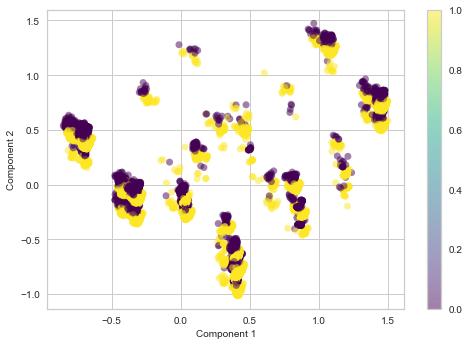

In [98]:
# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(General_PCA[:, 0], General_PCA[:, 1], c=General_Models_num_tr.continent_EU, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [99]:
# Fit the PCA algorithm to data 
pca = PCA().fit(General_Models_num_tr)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(General_Models_num_tr.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

Component Variance explained  Cumulative variance explained
0           1           0.256631                       0.256631
1           2           0.147769                       0.404400
2           3           0.099110                       0.503510
3           4           0.092538                       0.596048
4           5           0.069948                       0.665996
5           6           0.051680                       0.717676
6           7           0.043095                       0.760770
7           8           0.039077                       0.799847
8           9           0.038283                       0.838130
9          10           0.029201                       0.867331
10         11           0.026412                       0.893742
11         12           0.022964                       0.916706
12         13           0.020705                       0.937411
13         14           0.016218                       0.953630
14         15           0.008375                       0.962005
15         16           0.006635                       0.968640
16         17           0.005727                       0.974367
17         18           0.004934                       0.979300
18         19           0.004696                       0.983997
19         20           0.004489                       0.988486
20         21           0.003416                       0.991902
21         22           0.002130                       0.994032
22         23           0.001492                       0.995524
23         24           0.001488                       0.997013
24         25           0.000927                       0.997940
25         26           0.000694                       0.998634
26         27           0.000448                       0.999082
27         28           0.000427                       0.999509
28         29           0.000198                       0.999707
29         30           0.000153                       0.999860
30         31           0.000095                       0.999955
31         32           0.000045                       1.000000
32         33           0.000000                       1.000000
33         34           0.000000                       1.000000
34         35           0.000000                       1.000000

Text(0.5, 1.0, 'Explained variance by components')

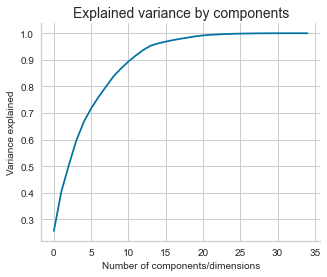

In [100]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

With 15 components it is possible to explain more than 95% of the variance. 

<a class="anchor" id="4.">
    
# 4. Modeling 

<a class="anchor" id="4.1">
    
## 4.1K-Means with PCA

In [101]:
# Apply the dimension reduction to the dataset (for 15 components)
pca_reduced = PCA(n_components = 15)
pca_reduced.fit(General_Models_num_tr)
X_pca = pca_reduced.transform(General_Models_num_tr) 
print(General_Models_num_tr.shape)

(59663, 35)


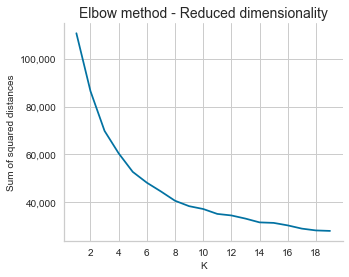

In [102]:
# Select K based on the sum of squared distances - Elbow method
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(General_Models_num_tr)
    ssd.append(km.inertia_)
    
# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(K, ssd, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Elbow method - Reduced dimensionality', fontsize=plots_Title_fontSize);

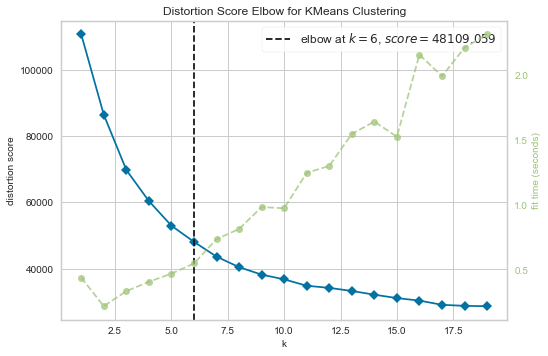

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(General_Models_num_tr)
visualizer.show()

In [104]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(General_Models_num_tr)
y_kmeans = kmeans.predict(General_Models_num_tr)

C:\Users\duart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


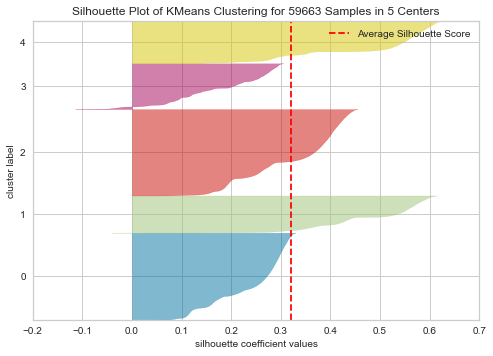

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 59663 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [105]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(General_Models_num_tr)
visualizer.show()

C:\Users\duart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


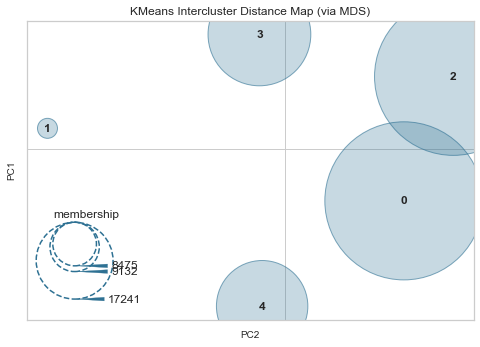

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [106]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(General_Models_num_tr)
visualizer.show()

<a class="anchor" id="4.2">
    
## 4.2 K-Means

In the following we will use the dataset with only numerical variables to test the K-Means without the PCA dimensionality reduction. 

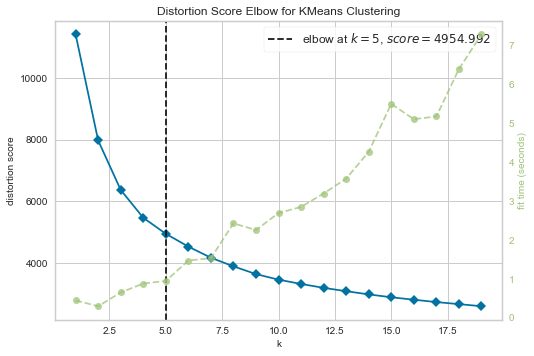

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(KMEANS_dataset_tr)
visualizer.show()

In [108]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(KMEANS_dataset_tr)
y_kmeans = kmeans.predict(KMEANS_dataset_tr)

C:\Users\duart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\duart\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


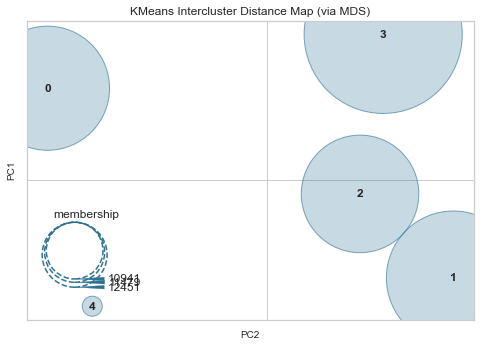

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [109]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(KMEANS_dataset_tr)
visualizer.show()

In [110]:
y_kmeans

array([3, 3, 3, ..., 1, 1, 3])

<a class="anchor" id="4.3">
    
## 4.3 Hierarchical Clustering

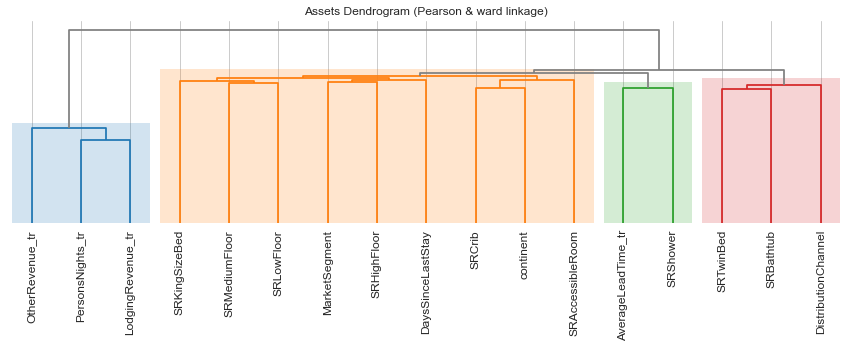

In [111]:
# Plot the dendogram for numeric and categorical variables 

# Draw
fig, ax = plt.subplots(figsize=(10,10))
dg = rp.plot_dendrogram(returns=General_Models_tr,
                               codependence='pearson',
                               linkage='ward',
                               k=None,
                               max_k=10,
                               leaf_order=True)

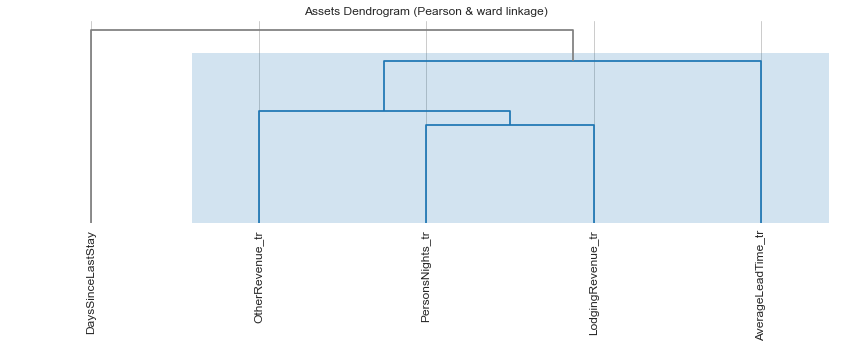

In [112]:
# Plot the dendogram only for numerical variables

# Draw
fig, ax = plt.subplots(figsize=(10,10))
dg = rp.plot_dendrogram(returns=KMEANS_dataset_tr,
                               codependence='pearson',
                               linkage='ward',
                               k=None,
                               max_k=10,
                               leaf_order=True)

From this Dendogram we can see that the largest vertical distance is observed whilst looking at 2 clusters. This is the reason why we implemented 2 clusters in the agglomerative clustering algorithm below. 
Moreover, it is also interesting to observe that the DBScan algirthm suggests us 2 clusters as well.

<a class="anchor" id="4.4">
    
## 4.4 Agglomerative Hierarchical Clustering 

We decided not to use the ward method because the runtime on our computer took too long. Hence, we decided to keep the single linkage method which is not as computationally expensive and has faster runtime. 

In [113]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

y_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
y_model = y_model.fit(AG_dataset_tr)
AG_dataset_tr['labels'] = y_model.labels_

In [114]:
AG_dataset_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59663 entries, 83589 to 1
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageLeadTime_tr  59663 non-null  float64
 1   LodgingRevenue_tr   59663 non-null  float64
 2   OtherRevenue_tr     59663 non-null  float64
 3   PersonsNights_tr    59663 non-null  float64
 4   DaysSinceLastStay   59663 non-null  float64
 5   labels              59663 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.2 MB


In [115]:
AG_dataset_tr['labels']

ID
83589    0
83587    0
83585    0
83583    0
83581    0
        ..
8        0
6        0
4        0
2        0
1        0
Name: labels, Length: 59663, dtype: int64

In [116]:
labels

['Corporate', 'Direct', 'Electronic Distribution', 'Travel Agent/Operator']

Because of an error in the plot we re-checked the variables from the KMEANS_dataset dataframe again and noticed that we do have -1 variables in the DaysSincelastStay. For this reason we went back to data preparataion and replaced these variables with 0. 

<a class="anchor" id="4.5">
    

## 4.5 Density-based Algorithm

The following Density-based algorithm "DBScan" is one of the most popular of its sort. Advantages of this algorithm are that we are not calculating any distance and thus are able to use also categorical values. 

In [117]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

# Generate data
General_Models_tr, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(General_Models_tr)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 0


In [118]:
labels

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,

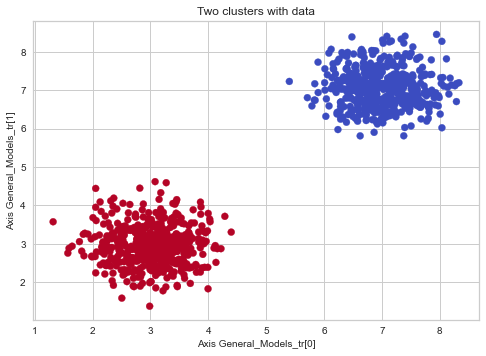

In [119]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(General_Models_tr[:,0], General_Models_tr[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis General_Models_tr[0]')
plt.ylabel('Axis General_Models_tr[1]')
plt.show()

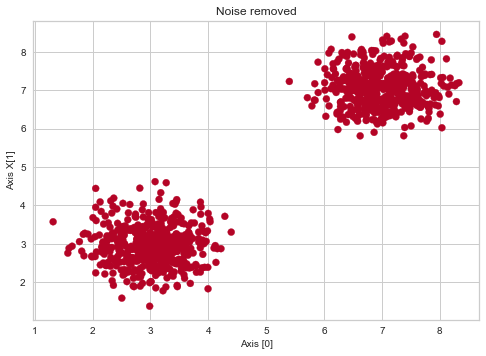

In [120]:
# Remove the noise
range_max = len(General_Models_tr)
General_Models_tr = np.array([General_Models_tr[i] for i in range(0, range_max) if labels[i] != -1])
labels = np.array([labels[i] for i in range(0, range_max) if labels[i] != -1])

# Generate scatter plot for training data
colors = list(map(lambda x: '#000000' if x == -1 else '#b40426', labels))
plt.scatter(General_Models_tr[:,0], General_Models_tr[:,1], c=colors, marker="o", picker=True)
plt.title(f'Noise removed')
plt.xlabel('Axis [0]')
plt.ylabel('Axis X[1]')
plt.show()

We runt he DBScan Algorithm with several parameters to try to find the best options. We mostly did changes on the following parameters: 

Changes: 
- epsilon from 1.0 to 0.5 
- algorithm from auto to "kd_tree"
- Dasaset being used: ds2

In conclusion, DBScan gave us 2 clusters and overall we still believe that K-Means forms the best clusters. 

<a class="anchor" id="4.6">
    
## 4.6 K-Prototype Algorithm

In [121]:
General_Models_tr_Proto = pd.DataFrame(General_Models_tr_Proto)

In [122]:
#Setting up for K-Prototype algorithm
mark_array = General_Models_tr_Proto.values

categorical_features_idx = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [123]:
# Function for plotting elbow curve
#def plot_elbow_curve(start, end, data):
    #no_of_clusters = list(range(start, end+1))
    #cost_values = []
    
    #for k in no_of_clusters:
        #test_model = KPrototypes(n_clusters=k, init='Huang', random_state=123)
        #test_model.fit_predict(data, categorical=categorical_features_idx)
        #cost_values.append(test_model.cost_)

    #sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)   
    #plt.figure(figsize=(15, 7))
    #ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    #ax.set_title('Elbow curve', fontsize=18)
    #ax.set_xlabel('No of clusters', fontsize=14)
    #ax.set_ylabel('Cost', fontsize=14)
    #ax.set(xlim=(start-0.1, end+0.1))
    #plt.plot();
    
# Plotting elbow curve for k=2 to k=10
#plot_elbow_curve(2,10,mark_array)

We've tried using two different methods to determine the best number of K for the K-Prototype but unfortunately both need too much comptuing power and time, with the first taking over 10 hours to get results and the second (which can be found above) takes about 3.5 hours. Because of this, we ran the code in a separate notebook and tested both results, which are K=3 and K=4 and found K=4 to be the best.

In [124]:
# Code is commented only because of long run time *******
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=100).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14237, ncost: 664700757.3207037
Run: 1, iteration: 2/100, moves: 7464, ncost: 476128676.9480125
Run: 1, iteration: 3/100, moves: 5061, ncost: 414231615.9728795
Run: 1, iteration: 4/100, moves: 2962, ncost: 396918697.17283523
Run: 1, iteration: 5/100, moves: 2063, ncost: 388651201.7556879
Run: 1, iteration: 6/100, moves: 1701, ncost: 382660730.4708059
Run: 1, iteration: 7/100, moves: 1589, ncost: 377785490.1944283
Run: 1, iteration: 8/100, moves: 1272, ncost: 374543274.02920973
Run: 1, iteration: 9/100, moves: 1193, ncost: 371537499.46744174
Run: 1, iteration: 10/100, moves: 1304, ncost: 368176776.13224685
Run: 1, iteration: 11/100, moves: 1215, ncost: 365161127.3279875
Run: 1, iteration: 12/100, moves: 1210, ncost: 362360064.66155535
Run: 1, iteration: 13/100, moves: 1161, ncost: 359954682.66326946
R

In [125]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['3.7231888209553956' '5.666195990059574' '3.94116982415938'
  '2.3807472481721565' '637.2392513909965' 'Travel Agent/Operator'
  'Other' 'EU' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['3.980610808134164' '5.882473684292474' '3.8388509792663617'
  '2.318977846350515' '145.36930175330667' 'Travel Agent/Operator'
  'Other' 'EU' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['3.6853163765185064' '5.5720553754109305' '3.998142724365824'
  '2.318847226816684' '912.1422457959135' 'Travel Agent/Operator' 'Other'
  'EU' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['3.5640903379793616' '5.771207757257705' '3.902197865469923'
  '2.317144012625304' '405.60725843735554' 'Travel Agent/Operator'
  'Other' 'EU' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']]


In [126]:
# Prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [127]:
#Adding the clustering to the dataset to be interpretable
General_Models_tr_Proto['cluster'] = list(clusters)

In [128]:
#Cluster 1 samples:
General_Models_tr_Proto[General_Models_tr_Proto['cluster']== 0].head(10)

AverageLeadTime_tr  LodgingRevenue_tr  OtherRevenue_tr  \
ID                                                              
33885            5.428835           7.883107         5.118592   
33837            1.587401           6.899864         4.700480   
33808            4.805896           6.774224         2.639057   
33799            4.379519           6.745236         4.859812   
33783            5.289572           7.005336         5.424950   
33781            2.000000           6.682109         4.836282   
33779            3.802952           6.850973         6.044531   
33773            6.447306           6.412967         6.289716   
33732            4.217163           6.394427         5.313206   
33727            5.265637           6.639876         4.779123   

       PersonsNights_tr  DaysSinceLastStay    DistributionChannel  \
ID                                                                  
33885          4.472136                523  Travel Agent/Operator   
33837          4.000000                522  Travel Agent/Operator   
33808          3.741657                522  Travel Agent/Operator   
33799          3.741657                522  Travel Agent/Operator   
33783          4.582576                522  Travel Agent/Operator   
33781          4.582576                522  Travel Agent/Operator   
33779          4.242641                524  Travel Agent/Operator   
33773          4.582576                522                 Direct   
33732          3.464102                522                 Direct   
33727          3.464102                522  Travel Agent/Operator   

               MarketSegment continent  SRHighFloor  SRLowFloor  ...  \
ID                                                               ...   
33885  Travel Agent/Operator        EU            0           0  ...   
33837                  Other        EU            0           0  ...   
33808                  Other        EU            0           0  ...   
33799                  Other        AF            0           0  ...   
33783                  Other        EU            0           0  ...   
33781  Travel Agent/Operator        EU            0           0  ...   
33779                  Other        EU            0           0  ...   
33773                 Direct        EU            0           0  ...   
33732                 Direct        EU            0           0  ...   
33727                  Other        EU            0           0  ...   

       SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                            
33885              0          0         0       0              0          0   
33837              0          0         0       0              0          0   
33808              0          0         0       0              1          0   
33799              0          0         0       0              1          0   
33783              0          0         0       0              0          0   
33781              0          0         0       0              0          0   
33779              0          0         0       0              1          0   
33773              0          0         0       0              0          0   
33732              0          0         0       0              0          1   
33727              0          0         0       0              0          1   

       SRNearElevator  SRNoAlcoholInMiniBar  SRQuietRoom  cluster  
ID                                                                 
33885               0                     0            0        0  
33837               0                     0            0        0  
33808               0                     0            0        0  
33799               0                     0            0        0  
33783               0                     0            0        0  
33781               0                     0            0        0  
33779               0                  

<a class="anchor" id="5.">
    
# 5. Cluster Interpretation

In [130]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca_reduced.components_,columns=General_Models_num_tr.columns)
wheightsDF

AverageLeadTime_tr  LodgingRevenue_tr  OtherRevenue_tr  PersonsNights_tr  \
0            -0.031381          -0.023114        -0.005257         -0.034065   
1            -0.075286           0.033253        -0.004868          0.006673   
2            -0.028766           0.046040        -0.003682          0.018665   
3            -0.019655          -0.025827        -0.048791         -0.052897   
4             0.016576          -0.015699        -0.012152         -0.072872   
5             0.249725           0.117350         0.168970          0.189865   
6             0.118218           0.113216         0.036506          0.052990   
7            -0.081415          -0.018943        -0.120146         -0.107518   
8            -0.155028          -0.120983        -0.103291         -0.151709   
9             0.357269           0.350404         0.500666          0.470183   
10            0.090047          -0.022379         0.010895         -0.005987   
11           -0.038087           0.014363         0.005171          0.006375   
12           -0.049615          -0.070322        -0.048790         -0.058969   
13           -0.856133           0.264621         0.334146          0.217053   
14           -0.033361           0.034293         0.030304         -0.014196   

    DaysSinceLastStay  DistributionChannel_Travel Agent/Operator  \
0           -0.011537                                  -0.422887   
1           -0.048673                                  -0.373616   
2           -0.026304                                  -0.095457   
3           -0.092403                                   0.022075   
4           -0.010381                                  -0.008081   
5           -0.126548                                   0.102636   
6           -0.648758                                   0.053178   
7           -0.631998                                  -0.198858   
8            0.334550                                  -0.236229   
9            0.130520                                  -0.185946   
10           0.091110                                  -0.027379   
11           0.015157                                   0.005768   
12          -0.005102                                   0.009197   
13          -0.051140                                   0.091109   
14          -0.019322                                  -0.477485   

    DistributionChannel_Direct  DistributionChannel_Corporate  \
0                     0.365968                       0.055407   
1                     0.368864                      -0.004034   
2                     0.092765                      -0.012923   
3                    -0.034354                       0.014259   
4                    -0.050030                       0.060943   
5                     0.129753                      -0.191913   
6                    -0.003905                      -0.048302   
7                    -0.165741                       0.331490   
8                    -0.154771                       0.379976   
9                    -0.110154                       0.304549   
10                   -0.020405                       0.040760   
11                   -0.018347                       0.016484   
12                    0.001793                      -0.017508   
13                   -0.018025                      -0.047029   
14                   -0.079547                       0.145531   

    DistributionChannel_Electronic Distribution  MarketSegment_Other  ...  \
0                                      0.001512            -0.618132  ...   
1                                      0.008785             0.264074  ...   
2                                      0.015616             0.438448  ...   
3                                     -0.001980            -0.062555  ...   
4                                     -0.002832            -0.101336  ...   
5                                     -0.040476            -0.170543  ...   
6                                     -0.000971       

In [131]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[14])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

MarketSegment_Corporate                        0.602020
DistributionChannel_Travel Agent/Operator      0.477485
DistributionChannel_Electronic Distribution    0.411500
MarketSegment_Travel Agent/Operator            0.256046
MarketSegment_Groups                           0.223052
MarketSegment_Other                            0.219260
MarketSegment_Direct                           0.187185
DistributionChannel_Corporate                  0.145531
MarketSegment_Aviation                         0.093627
DistributionChannel_Direct                     0.079547
LodgingRevenue_tr                              0.034293
AverageLeadTime_tr                             0.033361
OtherRevenue_tr                                0.030304
continent_AF                                   0.020572
DaysSinceLastStay                              0.019322
continent_OC                                   0.018925
SRTwinBed                                      0.015014
continent_EU                                   0

In [132]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(General_Models_num_tr[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

0         1         2  \
MarketSegment_Corporate                      0.063594  0.008272  0.002194   
DistributionChannel_Travel Agent/Operator    0.758167  0.878885  0.902294   
DistributionChannel_Electronic Distribution  0.021953  0.000964  0.000640   
MarketSegment_Travel Agent/Operator          0.097395  0.155730  0.212412   
MarketSegment_Groups                         0.147051  0.055979  0.172196   
MarketSegment_Other                          0.524610  0.671834  0.536148   
MarketSegment_Direct                         0.159770  0.104891  0.076684   
DistributionChannel_Corporate                0.057671  0.015180  0.019925   
MarketSegment_Aviation                       0.006359  0.002409  0.000000   
DistributionChannel_Direct                   0.162209  0.104971  0.077141   
LodgingRevenue_tr                            0.489985  0.627647  0.516201   
AverageLeadTime_tr                           0.452768  0.565840  0.775295   
OtherRevenue_tr                              0.442107  0.702244  0.584374   
continent_AF                                 0.011761  0.011806  0.004296   
DaysSinceLastStay                            0.235149  0.741022  0.612442   
continent_OC                                 0.007492  0.005220  0.006307   
SRTwinBed                                    0.097395  0.134126  0.172836   
continent_EU                                 0.800070  0.883624  0.879079   
PersonsNights_tr                             0.354927  0.622571  0.481792   
continent_AS                                 0.056799  0.029315  0.032447   
SRKingSizeBed                                0.324331  0.388081  0.316059   
SRCrib                                       0.008102  0.011726  0.005301   
continent_SA                                 0.040509  0.039836  0.027877   
SRQuietRoom                                  0.064204  0.097984  0.105932   
continent_NA                                 0.083195  0.030118  0.049904   
MarketSegment_Complementary                  0.001220  0.000883  0.000366   
SRHighFloor                                  0.041815  0.052044  0.038296   
SRMediumFloor                                0.000348  0.001446  0.001005   
SRLowFloor                                   0.000871  0.001446  0.001188   
SRShower                                     0.000958  0.001767  0.002102   

                                                    3         4  
MarketSegment_Corporate                      0.014576  0.063245  
DistributionChannel_Travel Agent/Operator    0.845730  0.755762  
DistributionChannel_Electronic Distribution  0.002815  0.013739  
MarketSegment_Travel Agent/Operator          0.130810  0.115931  
MarketSegment_Groups                         0.124805  0.113432  
MarketSegment_Other                          0.593494  0.546838  
MarketSegment_Direct                         0.134814  0.153174  
DistributionChannel_Corporate                0.016578  0.072329  
MarketSegment_Aviation                       0.001439  0.006018  
DistributionChannel_Direct                   0.134876  0.158170  
LodgingRevenue_tr                            0.652047  0.424067  
AverageLeadTime_tr                           0.663829  0.380914  
OtherRevenue_tr                              0.678040  0.448216  
continent_AF                                 0.007507  0.012149  
DaysSinceLastStay                            0.218881  0.738848  
continent_OC                                 0.013262  0.008175  
SRTwinBed                                    0.170472  0.081640  
continent_EU                                 0.836409  0.836153  
PersonsNights_tr                             0.600634  0.337947  
continent_AS                                 0.035346  0.054389  
SRKingSizeBed                                0.382296  0.304303  
SRCrib                                       0.012512  0.006245  
continent_SA                                 0.040475  0.036675  
SRQuietRoom                                  0.102221  0.063699  
continent_NA  

#### Insights:

**Cluster 0**: Asian and American corporate and aviation clients who book directly with the hotel
* Dominant Market Segments are corporate,direct and aviation
* Highest distribution channel: electronic distribution and channel direct
* Are predominanty Asian, South American and North American


**Cluster 1**: Leisure seeking tourists
* Is predominantly African and European
* Enjoys the hotel amenities the most (Highest Other Revenue)
* Longest amount of time between visits
* Highest ratio of people per room per night
* Clear preference for king size beds and medium floors

**Cluster 2**: Classic Group Tourist
* Dominant market segments are travel agent operator and groups
* Bookings come from online agencies and group bookings
* Predominant distribution channel for this segment is the travel agent/operator
* The ones who book the most in advance due to the high average lead time
* Have a clear preference for quiet rooms with a twin bed

**Cluster 3**: High Spenders (Rich Australian parents)
* Represent the highest lodging revenue
* Come mostly from the Oceania
* Have a preference for rooms in higher floors, with a crib and a shower

**Cluster 4**: Corporate Complimentary Bookings
* Highest Distribution channel is corporate
* Highest market segment complementary

<a class="anchor" id="6.">
    
# 6. Conclusion

With the regards to the Data Preparation, we were immediately strucked by the high level of bias of the dataset. For example, in the binary variables there's an overwhelming presence of No's ("0") in comparison to the Yes's (1). There was also a high number of observations (clients) who did not spend any amount of money which we thought wouldn't contribute to this clustering analysis and should be analysed seperately.